# Set-Up

In [52]:
%matplotlib inline
import csv
from datetime import datetime
from urlparse import urlparse
import json
import snap

In [79]:
import ast

dirLinkGraph = snap.LoadEdgeList(snap.PNGraph, "LinkGraph_ALL_pruned.txt", 0, 1)
undirLinkGraph = snap.LoadEdgeList(snap.PUNGraph, "LinkGraph_ALL_pruned.txt", 0, 1)

domainToNodeID = json.load(open("domainToNodeID_ALL.txt"))
nodeIDToDomain = {v: k for k, v in domainToNodeID.iteritems()}

prunedNodeIDs = set()
for Node in dirLinkGraph.Nodes():
    prunedNodeIDs.add(Node.GetId())

prunedDomainToNodeID = {k: v for k, v in domainToNodeID.iteritems() if v in prunedNodeIDs}
prunedNodeIDToDomain = {v: k for k, v in prunedDomainToNodeID.iteritems()}

In [54]:
print "Nodes in Graph", dirLinkGraph.GetNodes()
print "Edges in Graph", dirLinkGraph.GetEdges()
print "Number of Domains in Domain Dictionary", len(domains)

Nodes in Graph 8517
Edges in Graph 79051
Number of Domains in Domain Dictionary 380815


In [55]:
left_far_urls = set(['drudge.com', 'washingtonsources.org', 'akkadiantimes.com', 'deadstate.org', 'thelasource.com', 'americablog.com', 'meduza.io', 'thenewcivilrightsmovement.com', 'newstatesman.com', 'wonkette.com', 'mirror.co.uk', 'libcom.org', 'deepleftfield.info', 'intrepidreport.com', 'rawprogressive.com', 'viraltitle.com', 'worldcantwait.net', 'happy-foxie.com', 'newint.org', 'revcom.us', 'lavendermagazine.com', 'newrepublic.com', 'washingtonpress.com', 'theimproper.com', 'nationofchange.org', 'projectcensored.org', 'peacock-panache.com', 'newpol.org', 'democracyguardian.com', 'dallasvoice.com', 'uproxx.com', 'jezebel.com', 'bluedotdaily.com', 'content.news', 'boingboing.net', 'blacklivesmatter.com', 'reverepress.com', 'whatmattersnews.com', 'au.org', 'hrc.org', 'impeachdjtnow.com', 'leftoverrights.com', 'progressivefrontier.com', 'putintrump.org', 'progressive.org', 'newshounds.us', 'liberationnews.org', 'certifiedpolitics.com', 'angrywhitemen.org', 'forwardprogressives.com', 'theintellectualist.co', 'smirkingchimp.com', 'elitedaily.com', 'leftwingnation.org', 'daily49er.com', 'itsgoingdown.org', 'jacobinmag.com', 'tribunemagazine.org', 'leftscoop.com', 'democraticunderground.com', 'yesmagazine.org', 'newyorker.com', 'theroot.com', 'fifthestate.org', 'electronicintifada.net', 'allthatsfab.com', 'upworthy.com', 'moonofalabama.org', 'themaven.net', 'freepress.org', 'salon.com', 'carbonated.tv', 'mondoweiss.net', 'austinchronicle.com', 'globalvoices.org', 'thedailyvox.co.za', 'yourblackworld.net', 'meanlefthook.com', 'backedbyfact.com', 'gizmodo.com', 'liberalexaminer.com', 'care2.com', 'dctribune.org', 'leftfootforward.org', 'workers.org', 'newslogue.com', 'rewire.news', 'pravdareport.com', 'gq.com', 'foreignpolicyjournal.com', 'redpepper.org.uk', 'act.tv', 'leftsideofhistory.com', 'redyouth.org', 'politicaldig.com', 'crooksandliars.com', 'americanbridgepac.org', 'commondreams.org', 'chicagoreader.com', 'marxist.com', 'dailydot.com', 'nymag.com', 'guardianlv.com', 'telesurtv.net', 'pinknews.co.uk', 'filmingcops.com', 'photographyisnotacrime.com', 'washingtonmonthly.com', 'republicanssucks.org', 'theuspoliticalpost.com', 'ebar.com', 'politicususa.com', 'iowastartingline.com', 'lgbtqnation.com', 'blackagendareport.com', 'foreignpolicynews.org', 'opednews.com', 'thenation.com', 'pastemagazine.com', 'proudemocrat.com', 'thedailybanter.com', 'washingtonjournal.com', 'loveknowledge.org', 'codepink.org', 'worldsocialism.org', 'breitbartunmasked.com', 'samuel-warde.com', 'dailydems.com', 'advocate.com', 'internationalviewpoint.org', 'progressivearmy.com', 'aidc.org.za', 'samefacts.com', 'thefloridasqueeze.com', 'freedomnews.org.uk', 'people.com', 'elisabethparker.com', 'politicalupdater.com', 'earthfirstjournal.org', 'nowthisnews.com', 'wearyourvoicemag.com', 'chroniclesofdemocracy.com', 'thefrisky.com', 'modernliberals.com', 'blue-route.org', 'resilience.org', 'afj.org', 'gopocalypse.org', 'north99.org', 'curvemag.com', 'esquire.com', 'citizencritics.org', 'shadowproof.com', 'readingthepictures.org', 'ir.net', 'leftvoice.org', 'takepart.com', 'democracynow.org', 'other98.com', 'inthesetimes.com', 'scarymommy.com', 'dailykos.com', 'deepstatenation.com', 'feministcurrent.com', 'verrit.com', 'morningstaronline.co.uk', 'currentaffairs.org', 'bust.com', 'dieharddemocrat.com', 'rantt.com', 'littlegreenfootballs.com', 'citypaper.com', 'usuncut.com', 'extranewsfeed.com', 'evonomics.com', 'mashable.com', 'americanprogress.org', 'towleroad.com', 'verifiedpolitics.com', 'syriana-analysis.com', 'nap-sack.org', 'nova-magazine.net', 'tytnetwork.com', 'truth-out.org', 'dissentmagazine.org', 'theguardiansofdemocracy.com', 'redstatedisaster.com', 'nationalmemo.com', 'truthagainstthemachine.com', 'thinkprogress.org', 'countercurrents.org', 'frnewsreport.com', 'zcomm.org', 'mediamatters.org', 'theoswatch.com', 'thegrio.com', 'splinternews.com', 'the-daily.buzz', 'economyincrisis.org', 'texasobserver.org', 'electoral-vote.com', 'antifascistnews.net', 'truthdig.com', 'desmogblog.com', 'liberalamerica.org', 'motherjones.com', 'talkingpointsmemo.com', 'pressprogress.ca', 'ourvoiceny.com', 'addictinginfo.com', 'vox.com', 'everydayfeminism.com', 'merryjane.com', 'vanityfair.com', 'change.org', 'deadspin.com', 'inequalitymedia.org', 'queerty.com', 'rightwingwatch.org', 'front.moveon.org', 'theestablishment.co', 'cnntimes.online', 'pfaw.org', 'revolution-news.com', 'onegreenplanet.org', 'vermontindependent.org', 'prwatch.org', 'slate.com', 'bluenationreview.com', 'greenleft.org.au', 'themilitant.com', 'popularresistance.org', 'ips-dc.org', 'thelily.com', 'whowhatwhy.org', 'readersupportednews.org', 'news.groopspeak.com', 'thesternfacts.com', 'canadiandimension.com', 'rawstory.com', 'vote.us.org', 'molad.org', 'newscorpse.com', 'nowtoronto.com', 'dailynewsbin.com', 'bradford-delong.com', 'dailyrecord.co.uk', 'rabble.ca', 'progressiveliberal.net', 'theburningspear.com', 'bitchmedia.org', 'good.is', 'cnn.com', 'americanindependent.com', 'feministing.com', 'counterpunch.org', 'crimethinc.com', 'middleeastmonitor.com', 'crooked.com', 'huffingtonpost.com', 'freespeech.org', 'climaterealityproject.org', 'firstpost.com', 'egbertowillies.com', 'theoutline.com', 'stpete4peace.org', 'bluestatedaily.com', 'prospect.org', 'msmagazine.com', 'cosmopolitan.com', 'mediaite.com', 'rappler.com', 'villagevoice.com', 'thedailybeast.com', 'socialistworker.org', 'autostraddle.com', 'alternet.org', 'latest.com', 'shareblue.com', 'trofire.com', 'newsweek.com', 'palmerreport.com', 'sourcewatch.org', 'americannewsx.com', 'globetoday.com', 'miaminewtimes.com', 'themarysue.com', 'thewalrus.ca', 'this.org', 'thelondoneconomic.com', 'democratichub.com', 'thecanary.co', 'juancole.com', 'greenvillegazette.com'])
left_center_urls = set(['helsinkitimes.fi', 'indystar.com', 'news.trust.org', 'canadalandshow.com', 'lapresse.ca', 'timescolonist.com', 'ahtribune.com', 'rudaw.net', 'berkshireeagle.com', 'almasdarnews.com', 'theatlantic.com', 'wgntv.com', 'thenewstribune.com', 'ozy.com', 'politico.com', 'syriahr.com', 'billmoyers.com', 'denverpost.com', 'thelocal.no', 'populationconnection.org', 'elpasotimes.com', 'nakedcapitalism.com', 'buffalonews.com', 'thecitizen.org.au', 'ynetnews.com', 'timesofisrael.com', 'glamour.com', 'windsorstar.com', 'sfgate.com', 'stltoday.com', 'politicsthatwork.com', 'newsandgutsmedia.com', 'jointcenter.org', 'ydr.com', 'democratandchronicle.com', 'credoaction.com', 'vancouversun.com', 'outsidethebeltway.com', 'twincities.com', 'thenewtropic.com', 'scroll.in', 'phoenixnewtimes.com', 'taxjustice.net', 'mediafiledc.com', 'thefifthcolumnnews.com', 'freep.com', 'emirates247.com', 'wnyc.org', 'spiegel.de', 'thetab.com', 'al-monitor.com', 'saudigazette.com.sa', 'lethbridgeherald.com', 'atlantablackstar.com', 'urban.org', 'revealnews.org', 'bustle.com', 'legitgov.org', 'mwcnews.net', 'thewire.in', 'hindustantimes.com', 'themoscowtimes.com', 'humanium.org', 'cbsnews.com', 'fair.org', 'insidehighered.com', 'rfa.org', 'deccanherald.com', 'youthradio.org', 'qz.com', 'resourcegovernance.org', 'wingsoverscotland.com', 'dutchdailynews.com', 'sojo.net', 'lawfareblog.com', 'jihadica.com', 'panampost.com', 'economictimes.indiatimes.com', 'tomdispatch.com', 'greensboro.com', 'nj.com', 'caribbeanlifenews.com', 'insideclimatenews.org', 'inquirer.net', 'ohio.com', 'capitalgazette.com', 'diversityinc.com', 'therealnews.com', 'newsite.thehindu.com', 'shameproject.com', 'themonthly.com.au', 'abcnews.go.com', 'citizen.org', 'votevets.org', 'dawn.com', 'sandiegofreepress.org', 'kmov.com', 'newsy.com', 'heavy.com', 'staradvertiser.com', 'tucson.com', 'dailyclimate.org', 'bbc.com', 'neweurope.eu', 'alhayat.com', 'birminghammail.co.uk', 'commoncause.org', 'roanoke.com', 'cleantechnica.com', 'ajc.com', 'monthlyreview.org', 'bluestemprairie.com', 'courant.com', 'emptywheel.net', 'rooseveltinstitute.org', 'citizensforethics.org', 'silive.com', 'earthjustice.org', 'sootoday.com', 'necn.com', 'engadget.com', 'newser.com', 'morningconsult.com', 'ndtv.com', 'economicshelp.org', 'annistonstar.com', 'kotaku.com', 'nbcnews.com', 'berkeleyside.com', 'insidephilanthropy.com', 'opendemocracy.net', 'fpif.org', 'abc11.com', 'worldpolicy.org', 'gaystarnews.com', 'nationinstitute.org', 'news.cn', 'koreatimes.co.kr', 'newsday.com', 'independent.com', 'courier-journal.com', 'ncpolicywatch.com', 'propublica.org', 'time.com', 'positive.news', 'fresnobee.com', 'globalcitizen.org', 'sbs.com.au', 'inverse.com', 'prospectmagazine.co.uk', 'sfexaminer.com', 'news.sky.com', 'indymedia.org', 'news.mongabay.com', 'kurdistan24.net', 'msn.com', 'vice.com', 'icenews.is', 'carolinapublicpress.org', 'irrawaddy.com', 'fightforthefuture.org', 'euractiv.com', 'theneed2know.com', 'cctv-america.com', 'presstv.com', 'digg.com', 'inquisitr.com', 'fusion.net', 'factmyth.com', 'affinitymagazine.us', 'uawire.org', 'alliedprogress.org', 'miamiherald.com', 'tabletmag.com', 'statesman.com', 'seattletimes.com', 'taxpolicycenter.org', 'nydailynews.com', 'ctvnews.ca', 'greentechmedia.com', 'fastcompany.com', 'ctj.org', 'thestranger.com', 'chicago.suntimes.com', 'ciponline.org', 'theautomaticearth.com', 'calgaryherald.com', 'cnbc.com', 'wvgazettemail.com', 'republicworld.com', 'al-sura.com', 'thisisthezerohour.com', 'metro.co.uk', 'politicalcritique.org', 'hurriyetdailynews.com', 'feministfrequency.com', 'inews.co.uk', 'startribune.com', 'tampabay.com', 'eff.org', 'macleans.ca', 'lawnewz.com', 'psmag.com', 'adn.com', 'nrdc.org', 'freakonomics.com', 'metro.us', 'liberalmountain.com', 'natmonitor.com', 'newstimes.com', 'globalriskinsights.com', 'baltimoresun.com', 'nature.org', 'rationalwiki.org', 'sfglobe.com', 'timesheadline.com', 'delawareonline.com', 'swissinfo.ch', 'freepress.net', 'wilderness.org', 'sltrib.com', 'guttmacher.org', 'baptistnews.com', 'ibtimes.com', 'geopoliticsalert.com', 'budapestbeacon.com', 'pilotonline.com', 'euobserver.com', 'muncievoice.com', 'thetyee.ca', 'thechristianleft.org', 'stopfake.org', 'cjr.org', 'koco.com', 'bangordailynews.com', 'pluralist.com', 'minnpost.com', 'nytimes.com', 'newmatilda.com', 'bostonglobe.com', 'citizentruth.org', 'demos.org', 'populardemocracy.org', 'colombiareports.com', 'ifamericaknew.org', 'healthyway.com', 'attn.com', 'thebaffler.com', 'mprnews.org', 'theringer.com', 'thestar.com', 'worldaffairsjournal.org', 'theguardian.com', 'imeu.org', 'globaltimes.cn', 'citizen-times.com', 'sacbee.com', 'migrationpolicy.org', 'hollywoodreporter.com', 'mysanantonio.com', 'northjersey.com', 'yahoo.com', 'corporatepresidency.org', 'irinnews.org', 'hcn.org', 'backchannel.com', 'upr.org', 'fivethirtyeight.com', 'businessinsider.com', 'tcf.org', 'atlanticmedia.com', 'thehill.com', 'charlotteobserver.com', 'knightfoundation.org', 'medium.com', 'thevarsity.ca', 'santafenewmexican.com', 'oilandwaterdontmix.org', 'wired.com', 'pressdemocrat.com', 'pbs.org', 'canadians.org', 'pressherald.com', 'philly.com', 'ocweekly.com', 'thesaturdaypaper.com.au', 'lifehacker.com', 'theoslotimes.com', 'aol.com', 'npr.org', 'commonwealmagazine.org', 'ips.org', 'leftjustified.com', 'nationalobserver.com', 'interpretermag.com', 'adl.org', 'sentencingproject.org', 'bloomberg.com', 'hrw.org', 'investigaterussia.org', 'chicagoreporter.com', 'rollingstone.com', 'theintercept.com', 'nationalnewswatch.com', 'pri.org', 'oneindia.com', 'dailytarheel.com', 'theweek.com', 'uft.org', 'cleveland.com', 'councilforthenationalinterest.org', 'theage.com.au', 'theolympian.com', 'africanarguments.org', 'ourworldindata.org', 'magazine.atavist.com', 'newsdeeply.com', 'dutchreview.com', 'dw.com', 'stocksnewsdaily.com', 'deadline.com', 'aljazeera.com', 'mainebeacon.com', 'abovethelaw.com', 'aclu.org', 'forward.com', 'thestate.com', 'liveleak.com', 'providencejournal.com', 'mic.com', 'kuow.org', 'mtdemocrat.com', 'ecfr.eu', 'irishtimes.com', 'elpais.com', 'thetrace.org', 'commonwealthfund.org', 'newsone.com', 'france24.com', 'newsobserver.com', 'wallstreetonparade.com', 'aranews.net', 'mintpressnews.com', 'fairvote.org', 'thesunmagazine.org', 'eastbaytimes.com', 'independentaustralia.net', 'usatoday.com', 'calwatchdog.com', 'zeit.de', 'exposingtruth.com', 'latimes.com', 'cbc.ca', 'news.com.au', 'toinformistoinfluence.com', 'thenextweb.com', 'universitybusiness.com', 'kentucky.com', 'smh.com.au', 'texasmonthly.com', 'worldcrunch.com', 'buzzfeed.com', 'newmoderate.com', 'dailyhive.com', 'amny.com', 'heraldnet.com', 'haaretz.com', 'timesunion.com', 'jsonline.com', 'washingtonblade.com', 'itep.org', 'newsgru.com', 'sfchronicle.com', 'brookings.edu', 'alaraby.co.uk', 'axios.com', 'lohud.com', 'youthrights.org', 'independent.co.uk', 'egyptianstreets.com', 'stepfeed.com', 'harpers.org', 'americamagazine.org', 'vulture.com', 'seattlepi.com', 'patrioticmillionaires.org', 'newleftreview.org', 'scoopwhoop.com', 'fwweekly.com', 'nola.com', 'pennlive.com', 'mexiconewsdaily.com', 'ipolitics.ca', 'jpost.com', 'kfor.com', 'rightweb.irc-online.org', 'usnews.com', 'crosscut.com', 'washingtonpost.com', 'icrw.org', 'historynewsnetwork.org', 'thenevadaindependent.com', 'sandiegoreader.com', 'bjreview.com', 'techdirt.com', 'crisisgroup.org', 'techcrunch.com', 'religionnews.com', 'latintimes.com', 'stuff.co.nz', 'epi.org', 'montrealgazette.com', 'globalnews.ca', 'unicornriot.ninja', 'opposingviews.com', 'democracy21.org', 'grist.org', 'naacp.org', 'azdailysun.com', 'pulsegulfcoast.com', 'us.blastingnews.com', 'governing.com', 'edmontonjournal.com', 'highline.huffingtonpost.com', 'secondnexus.com', 'theverge.com', 'kansascity.com', 'mercurynews.com', 'aeon.co', 'apmreports.org', 'dcreport.org', 'cbpp.org', 'theodysseyonline.com', 'transequality.org', 'factbox.tv', 'timeline.com', 'mnn.com', 'splcenter.org', 'brennancenter.org'])
right_center_urls = set(['newsheist.com', 'theobjectivestandard.com', 'washingtontimes.com', 'hpenews.com', 'gazette.com', 'cfr.org', 'al.com', 'richmond.com', 'pe.com', 'lexingtoninstitute.org', 'realcleardefense.com', 'policyed.org', 'theihs.org', 'newsrescue.com', 'thesmokinggun.com', 'financialpost.com', 'thegazette.com', 'hoover.org', 'cjnews.com', 'duluthnewstribune.com', 'manhattan-institute.org', 'cincinnati.com', 'studentnewsdaily.com', 'jamestown.org', 'columbiadailyherald.com', 'lbc.co.uk', 'breakingdefense.com', 'thefiscaltimes.com', 'militarytimes.com', 'lfpress.com', 'checkyourfact.com', 'desertsun.com', 'watchdog.org', 'nationalaffairs.com', 'taxpayer.com', 'heraldsun.com.au', 'thenewatlantis.com', 'nationalpost.com', 'postbulletin.com', 'cjonline.com', 'thereaganbattalion.com', 'dallasnews.com', 'post-gazette.com', 'jewishpress.com', 'christianitytoday.com', 'fortnightlyreview.co.uk', 'chicagotribune.com', '9news.com.au', 'realclearreligion.org', 'washingtonbabylon.com', 'srnnews.com', 'volkskrant.nl', 'lynx.media', 'thenational.ae', 'commdiginews.com', 'thebreakthrough.org', 'rstreet.org', 'algemeiner.com', 'honestreporting.com', 'circa.com', 'news-gazette.com', 'arkansasonline.com', 'theamericanconservative.com', 'tennessean.com', 'eppc.org', 'the-japan-news.com', 'savannahnow.com', 'tbo.com', 'americanfirearms.org', 'fpri.org', 'israelnationalnews.com', 'acsh.org', 'thelibertarianrepublic.com', 'valuewalk.com', 'manilatimes.net', 'realclearpolitics.com', 'rep-am.com', 'thechronicleherald.ca', 'deseretnews.com', 'spectator.co.uk', 'justfacts.com', 'heterodoxacademy.org', 'thetimes.co.uk', 'couriermail.com.au', 'ottawacitizen.com', 'guns.com', 'nation.com.pk', 'westmonster.com', 'antiwar.com', 'swarajyamag.com', 'sungazette.com', 'remingtonresearchgroup.com', 'americanactionforum.org', 'tulsaworld.com', 'theaustralian.com.au', 'thehindubusinessline.com', 'straitstimes.com', 'peninsuladailynews.com', 'japantoday.com', 'foreignpolicyi.org', 'deccanchronicle.com', 'statesmanjournal.com', 'fbherald.com', 'independent.ie', 'standard.co.uk', 'independent.org', 'nypost.com', '71republic.com', 'downsizinggovernment.org', 'sofrep.com', 'cato.org', 'reviewjournal.com', 'gulfnews.com', 'orlandosentinel.com', 'thetimesherald.com', 'forbes.com', 'dispatch.com', 'spokesman.com', 'oklahoman.com', 'freedomhouse.org', 'the-american-interest.com', 'thestarphoenix.com', 'cei.org', 'afpc.org', 'sbsun.com', 'israelhayom.com', 'itv.com', 'mises.org', 'tharawat-magazine.com', 'thequint.com', 'rasmussenreports.com', 'justfactsdaily.com', 'telegraph.co.uk', 'billingsgazette.com', 'azcentral.com', 'mackinac.org', 'tass.com', 'learnliberty.org', 'taxfoundation.org', 'omaha.com', 'oilprice.com', 'jewishbreakingnews.com', 'jns.org', 'capoliticalreview.com', 'campaignforliberty.org', 'reason.com', 'triblive.com', 'punchingbagpost.com', 'franklincenterhq.org', 'sputniknews.com', 'inhomelandsecurity.com', 'realclearinvestigations.com', 'tnonline.com', 'insidesources.com', 'oaoa.com', 'ocregister.com', 'group30.org', 'koreaherald.com', 'realclearpolicy.com', 'arabnews.com', 'fortune.com', 'russia-insider.com', 'theepochtimes.com', 'daltondailycitizen.com', 'dailynews.com', 'wsj.com', 'nationalinterest.org', 'fraserinstitute.org', 'sun-sentinel.com', 'calgarysun.com', 'fee.org', 'c4ss.org', 'jacksonville.com', 'thewest.com.au', 'bostonherald.com', 'nos.nl', 'pacificresearch.org', 'edmontonsun.com', 'theglobeandmail.com', 'newsline.com', 'theecjournal.com', 'timeslive.co.za', 'mynorthwest.com', 'kutv.com', 'detroitnews.com', 'ntd.tv', 'journalnow.com', 'humanprogress.org', 'tallahassee.com', 'oregonlive.com', 'mlive.com', 'star-telegram.com', 'international.thenewslens.com', 'toledoblade.com', 'chronicle.augusta.com', 'dailyherald.com', 'valleynewslive.com', 'libertyviral.com', 'faithfamilyamerica.com', 'wikileaks.org', 'dailypress.com', 'armstrongeconomics.com', 'kansas.com', 'thejacknews.com', 'strategic-culture.org', 'quillette.com', 'bipartisanpolicy.org', 'americasquarterly.org'])
right_far_urls = set(['twitchy.com', 'hermancain.com', 'politifeed.net', 'capitalresearch.org', 'politicsnote.com', 'powerlineblog.com', 'clear-politics.com', 'thecitizenpress.com', 'redflagnews.com', 'lifenews.com', 'bluelivesmatter.blue', 'mrc.org', 'commentarymagazine.com', 'nccivitas.org', 'gopusa.com', 'controversialtimes.com', 'thesun.co.uk', 'tennesseestar.com', 'unbiasedamerica.com', 'thenewamerican.com', 'aa.com.tr', 'redalertpolitics.com', 'cowgernation.com', 'opslens.com', 'therightscoop.com', 'hoover.org', 'onenewsnow.com', 'teapartytribune.com', 'therealstrategy.com', 'faithwire.com', 'ronpaullibertyreport.com', 'theblaze.com', 'westernjournal.com', 'crimeresearch.org', 'christiannewsalerts.com', 'beinglibertarian.com', 'unitynewsnetwork.co.uk', 'fedsoc.org', 'vesselnews.io', 'unionleader.com', 'notliberal.com', 'adelaidenow.com.au', 'erlc.com', 'alphanewsmn.com', 'factsandlogic.org', 'campaignlifecoalition.com', 'drudgereport.com', 'firstinfreedomdaily.com', 'libertyhangout.org', 'conservativedailynews.com', 'offgridsurvival.com', 'ibleedredwhiteblue.com', 'ac2news.com', 'whatfinger.com', 'thedailyliberator.com', 'dcstatesman.com', 'acculturated.com', 'politichicks.com', 'order-order.com', 'freedomworks.org', 'theblacksphere.net', 'dailysignal.com', 'express.co.uk', 'ronpaulinstitute.org', 'americanthinker.com', 'mediaequalizer.com', 'jewishworldreview.com', 'gop.com', 'nationalreview.com', 'ipatriot.com', 'newrevolutionnow.org', 'kansaspolicy.org', 'libertynation.com', 'economicpolicyjournal.com', 'renewedright.com', 'thefederalist.com', 'lyincomey.com', 'freerepublic.com', 'freewestmedia.com', 'altnewsmedia.net', 'conservativetoday.com', 'sbgi.net', 'chicksontheright.com', 'debatepost.com', 'restoreamericanglory.com', 'farleftwatch.com', 'ussanews.com', 'futureinamerica.com', 'colddeadhands.us', 'unwatch.org', 'en.mehrnews.com', 'illinoispolicy.org', 'uspoliticsinfo.com', 'americanmilitarynews.com', 'defenddemocracy.org', 'home.nra.org', 'projectveritas.com', 'americanewshub.com', 'dangerous.com', 'conservativewoman.co.uk', 'theconservativenut.gop', 'theamericancause.org', 'biggovernment.news', 'whitehouse.gov', 'tasnimnews.com', 'observer.com', 'humanevents.com', 'bigleaguepolitics.com', 'publicinterestlegal.org', 'nextnewsnetwork.com', 'ammoland.com', 'spectator.org', 'patriotpost.us', 'numbersusa.com', 'ijr.com', 'legalinsurrection.com', 'loneconservative.com', 'therebel.media', 'quadrant.org.au', 'wnd.com', 'dailytelegraph.com.au', 'brexitcentral.com', 'newbostonpost.com', 'regated.com', 'thedailydefender.com', 'townhall.com', 'dcwhispers.com', 'silenceisconsent.net', 'worldtribune.com', 'conservativebase.com', 'newlypress.com', 'foxnews.com', 'iwf.org', 'rd.com', 'westernfreepress.com', 'ca-political.com', 'citizensunited.org', 'keepandbear.com', 'judicialnetwork.com', 'youngcons.com', 'freebeacon.com', 'jewishpolicycenter.org', 'citizenfreepress.com', 'lifesitenews.com', 'aclj.org', 'academia.org', 'conservativereview.com', 'sonorannews.com', 'teapartypatriots.org', 'beliefnet.com', 'nationalcenter.org', 'firstthings.com', 'dailymail.co.uk', 'tpusa.com', '2ndvote.com', 'awm.com', 'newsbusters.org', 'dailycaller.com', 'weaselzippers.us', 'heritage.org', 'americandailynews.org', 'mercatornet.com', 'ontarioproud.ca', 'federalistpress.com', 'ntknetwork.com', 'acting-man.com', 'conservativeshere.com', 'politi.site', 'weeklystandard.com', 'ricochet.com', 'mediacircus.com', 'libertyheadlines.com', 'g-a-i.org', 'investors.com', 'hillarydaily.com', 'imprimis.hillsdale.edu', 'bearingarms.com', 'chroniclesmagazine.org', 'guerrilla.news', 'knoxreport.com', 'westernjournalism.com', 'louderwithcrowder.com', 'allenbwest.com', 'tehrantimes.com', 'standpointmag.co.uk', 'oann.com', 'getreligion.org', 'deplorablesreport.com', 'energycitizens.org', 'crisismagazine.com', 'fightpp.org', 'tribunist.com', 'themilreview.com', 'alec.org', 'churchmilitant.com', 'hudson.org', 'ifstudies.org', 'gatestoneinstitute.org', 'aei.org', 'campusreform.org', 'patriotretort.com', 'populistwire.com', 'world.wng.org', 'amgreatness.com', 'city-journal.org', 'washingtonexaminer.com', 'intellectualtakeout.org', 'thehayride.com', 'arizonadailyindependent.com', 'therantidote.com', 'theresurgent.com', 'americanlibertyreport.com', 'dailysurge.com', 'disobedientmedia.com', 'libertytalk.fm', 'theconservativetreehouse.com', 'conservativeoutfitters.com', 'americanconsequences.com', 'libertynews.com', 'bizpacreview.com', 'thetruthaboutguns.com', 'newsmax.com', 'torontosun.com', 'lifezette.com', 'heartland.org', 'secureamericanow.org', 'thepostemail.com', 'ff.org', 'cscmediagroupus.com', 'thecollegefix.com', 'carepublican.com', 'heatst.com', 'trtworld.com', 'conservativesus.party', 'independentsentinel.com', 'vivaliberty.com', 'aim.org', 'familysecuritymatters.org', 'yellowhammernews.com', 'lifeandabout.com', 'offendedamerica.com', 'sentinelksmo.org', 'savejersey.com', 'resistancemedia.org', 'christianpost.com', 'thepostmillennial.com', 'conservativeinstitute.org', 'thepoliticalinsider.com', 'yaf.org', 'dailysabah.com', 'pjmedia.com', 'spiked-online.com', 'freedomcrossroads.com', 'dailywire.com', 'patriotnewsdaily.com', 'usapoliticstoday.com', 'conservativehq.com'])

left_urls = left_far_urls | left_center_urls
right_urls = right_far_urls | right_center_urls

print "Num Far Left", len(left_far_urls)
print "Num Left Center", len(left_center_urls)
print "Num Far Right", len(right_far_urls)
print "Num Right Center", len(right_center_urls)
print "=" * 20
print "Num Left", len(left_urls)
print "Num Right", len(right_urls)

Num Far Left 294
Num Left Center 439
Num Far Right 257
Num Right Center 208
Num Left 733
Num Right 464


In [112]:
import gensim
depth_embedding = gensim.models.Word2Vec.load_word2vec_format('graph_p01q10.emb', binary=False)
breadth_embedding = gensim.models.Word2Vec.load_word2vec_format('graph_p10q01.emb', binary=False)

In [57]:
domains['twitchy.com']

33094

# Create Feature Vectors

In [59]:
PRankH = snap.TIntFltH()
snap.GetPageRank(dirLinkGraph, PRankH)
PRankH.SortByDat()
prank_keys = snap.TIntV()
PRankH.GetKeyV(prank_keys)
last_index = prank_keys.LastValN()

for i in range(10): 
    key = prank_keys[last_index - i]
    print node_to_domain[key], PRankH[key]

linkedin.com 0.0143242908405
dx.doi.org 0.00810336976483
forbes.com 0.0046803604255
bit.ly 0.00375990449147
change.org 0.00334012266881
sciencedirect.com 0.00250448802421
itunes.apple.com 0.00236098620359
nytimes.com 0.00224409975992
dailymotion.com 0.00218511054107
en.wikipedia.org 0.00215115675958


In [60]:
EigenVC = snap.TIntFltH()
snap.GetEigenVectorCentr(undirLinkGraph, EigenVC)
EigenVC.SortByDat()
eigen_keys = snap.TIntV()
PRankH.GetKeyV(eigen_keys)
last_index = eigen_keys.LastValN()

for i in range(10): 
    key = eigen_keys[last_index - i]
    print node_to_domain[key], EigenVC[key]

linkedin.com 0.0488291918408
dx.doi.org 0.00886865955436
forbes.com 0.0582526894455
bit.ly 0.0702367326944
change.org 0.0206494726795
sciencedirect.com 0.0230831151885
itunes.apple.com 0.0621929521621
nytimes.com 0.177323811532
dailymotion.com 0.00865616812125
en.wikipedia.org 0.0938286822044


In [80]:
import math 

def commonNeighbors(node_id1, node_id2):
    Nbrs = snap.TIntV()
    snap.GetCmnNbrs(LinkGraph, node_id1, node_id2, Nbrs)

    common_neighbors = Nbrs.Len()
    
    NodeVec = snap.TIntV()
    snap.GetNodesAtHop(LinkGraph, node_id1, 1, NodeVec, False)
    node1_neighbors = set()
    for item in NodeVec:
        node1_neighbors.add(item)
    
    NodeVec = snap.TIntV()
    snap.GetNodesAtHop(LinkGraph, node_id2, 1, NodeVec, False)
    node2_neighbors = set()
    for item in NodeVec:
        node2_neighbors.add(item)
    
    union = node1_neighbors | node2_neighbors
    jaccard = float(common_neighbors)/len(union)
    
    pref_attach = len(node1_neighbors) * len(node2_neighbors)
    
    adamic = 0
    for node in union: 
        NodeVec = snap.TIntV()
        snap.GetNodesAtHop(LinkGraph, node, 1, NodeVec, False)
        length = NodeVec.Len()
        if length == 1:
            continue
        adamic += 1/float(math.log(length)) 
    
    return [common_neighbors, jaccard, pref_attach, adamic]

In [413]:
def pruneArticleList(articles):
    item = []
    for article in articles: 
        if article not in prunedDomainToNodeID:
            continue 
        item.append(article)
    return item
    
left = pruneArticleList(left_urls)
right = pruneArticleList(right_urls)

import random 

random.seed(311)

random.shuffle(left)
random.shuffle(right)

idx1 = int(len(left) * 0.7)
idx2 = int(len(left) * 0.8)
left_train = left[:idx1]
left_test = left[idx1:idx2]
left_val = left[idx2:]

idx1 = int(len(right) * 0.7)
idx2 = int(len(right) * 0.8)
right_train = right[:idx1]
right_val = right[idx1:idx2]
right_test= right[idx2:]

In [414]:
print len(left_train), len(left_test)
print len(right_train), len(right_test)

267 38
136 39


In [415]:
left[0]

'eastbaytimes.com'

In [416]:
import pickle

with open('left_train', 'wb') as fp:
    pickle.dump(left_train, fp)
with open('right_train', 'wb') as fp: 
    pickle.dump(right_train, fp)
with open('left_test', 'wb') as fp:
    pickle.dump(left_test, fp)
with open('right_test', 'wb') as fp:
    pickle.dump(right_test, fp)

In [417]:
# Oversample right_train to be equal to left_train
original_right_train = list(left_train)

for i in range(len(left_train) - len(right_train)):
    idx = random.randint(0, len(original_right_train) - 1)
    right_train.append(original_right_train[idx])

In [468]:
fox_news_id =  prunedDomainToNodeID["foxnews.com"]
ny_times_id = prunedDomainToNodeID["nytimes.com"]

NIdCCfH = snap.TIntFltH()
snap.GetNodeClustCf(LinkGraph, NIdCCfH)

def createFeatureVec(article_set):
    mapping = []
    for article in article_set: 
        node_id = prunedDomainToNodeID[article]
        node = dirLinkGraph.GetNI(node_id)
        node_degree = node.GetDeg() 
        clustering_coefficient = NIdCCfH[node_id]
        Length1 = snap.GetShortPath(dirLinkGraph, node_id, ny_times_id, True)
        Length2 = snap.GetShortPath(dirLinkGraph, node_id, fox_news_id, True)
        Length3 = snap.GetShortPath(dirLinkGraph, node_id, fox_news_id)

        NYTimesNeighbors = commonNeighbors(node_id, ny_times_id)
        FoxNewsNeighbors = commonNeighbors(node_id, fox_news_id)
        feature_vec = [node_degree, clustering_coefficient, Length1, Length2, Length3] + NYTimesNeighbors + FoxNewsNeighbors
        mapping.append(feature_vec)
    return mapping

hand_left_train_features = createFeatureVec(left_train)
hand_left_test_features = createFeatureVec(left_test)
hand_right_train_features = createFeatureVec(right_train)
hand_right_test_features = createFeatureVec(right_test)

In [469]:
import numpy as np

def createEvalSet(right, left): 
    left_numpy =np.array([np.array(xi) for xi in left])
    right_numpy = np.array([np.array(xi) for xi in right])
    total_array = np.vstack([left_numpy, right_numpy])
    labels = [0] * len(left) + [1] * len(right)
    
    return total_array, labels
hand_train_input, hand_train_output = createEvalSet(hand_right_train_features, hand_left_train_features)
hand_test_input, hand_test_output = createEvalSet(hand_right_test_features, hand_left_test_features)

In [470]:
from xgboost import XGBClassifier 
hand_clf = XGBClassifier(n_estimators=100) 

hand_full = hand_clf.fit(hand_train_input, hand_train_output,
        eval_set=[(hand_train_input, hand_train_output), (hand_test_input, hand_test_output)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.689321	validation_1-logloss:0.690004
[1]	validation_0-logloss:0.685802	validation_1-logloss:0.688119
[2]	validation_0-logloss:0.682575	validation_1-logloss:0.68448
[3]	validation_0-logloss:0.679706	validation_1-logloss:0.683375
[4]	validation_0-logloss:0.677307	validation_1-logloss:0.682316
[5]	validation_0-logloss:0.673287	validation_1-logloss:0.682714
[6]	validation_0-logloss:0.669411	validation_1-logloss:0.682011
[7]	validation_0-logloss:0.664389	validation_1-logloss:0.67895
[8]	validation_0-logloss:0.661482	validation_1-logloss:0.679472
[9]	validation_0-logloss:0.658773	validation_1-logloss:0.681159
[10]	validation_0-logloss:0.656799	validation_1-logloss:0.678681
[11]	validation_0-logloss:0.654485	validation_1-logloss:0.680539
[12]	validation_0-logloss:0.651113	validation_1-logloss:0.682862
[13]	validation_0-logloss:0.649269	validation_1-logloss:0.682043
[14]	validation_0-logloss:0.646301	validation_1-logloss:0.683385
[15]	validation_0-logloss:0.645365	va

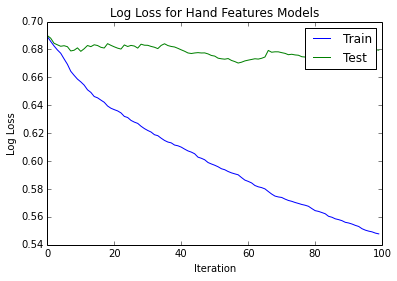

In [621]:
import matplotlib.pyplot as plt

hand_results_full = hand_full.evals_result()

plt.plot(range(len(hand_results_full['validation_0']['logloss'])), hand_results_full['validation_0']['logloss'], label='Train')
plt.plot(range(len(hand_results_full['validation_1']['logloss'])), hand_results_full['validation_1']['logloss'], label='Test')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss for Hand Features Models')
plt.legend()
plt.savefig('logloss_hand.png')

In [537]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

Y_pred = hand_clf.predict(hand_train_input) #prediksi data cross validation menggunakan model tadi
Y_pred_margin = hand_clf.predict(hand_train_input, output_margin="True")
print len(Y_pred_margin), len(hand_train_output)

train_f1score = f1_score(hand_train_output, Y_pred)
train_rocscore = roc_auc_score(hand_train_output, Y_pred_margin)
train_accuracy_score = accuracy_score(hand_train_output, Y_pred)

Y_pred_margin = hand_clf.predict(hand_test_input)
Y_pred = hand_clf.predict(hand_test_input) #prediksi data cross validation menggunakan model tadi
test_f1score = f1_score(hand_test_output, Y_pred, average="micro")
test_rocscore = roc_auc_score(hand_test_output, Y_pred_margin)
test_accuracy_score = accuracy_score(hand_test_output, Y_pred)

print "Train f1: ", train_f1score
print "Train AUC: ", train_rocscore
print "Train Accuracy: ", train_accuracy_score

print "Test f1: ", test_f1score
print "Test AUC: ", test_rocscore
print "Test Accuracy: ", test_accuracy_score



534 534
Train f1:  0.743925233645
Train AUC:  0.84456928839
Train Accuracy:  0.743445692884
Test f1:  0.545454545455
Test AUC:  0.546558704453
Test Accuracy:  0.545454545455


In [524]:
Y_pred = hand_clf.predict(hand_left_train_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Accuracy", left_accuracy 

Y_pred = hand_clf.predict(hand_right_train_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Accuracy", right_accuracy 


Left Accuracy 0.741573033708
0.741573033708
0.74531835206
Right Accuracy 0.74531835206


In [476]:
Y_pred = hand_clf.predict(hand_left_test_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Accuracy", left_accuracy 

Y_pred = hand_clf.predict(hand_right_test_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Accuracy", right_accuracy 



Left Accuracy 0.631578947368
Right Accuracy 0.461538461538


# Node2Vec Embeddings

In [477]:
def urlToEmbedding(url, embedding):
    node_id = prunedDomainToNodeID[url]
    if embedding == "depth":
        return depth_embedding[str(node_id)]
    else:
        return breadth_embedding[str(node_id)]

depth_left_train_features = [urlToEmbedding(url, "depth") for url in left_train]
depth_left_test_features = [urlToEmbedding(url, "depth") for url in left_test]
depth_right_train_features = [urlToEmbedding(url, "depth") for url in right_train]
depth_right_test_features = [urlToEmbedding(url, "depth") for url in right_test]

In [482]:
depth_train_input, depth_train_output = createEvalSet(depth_right_train_features, depth_left_train_features)
depth_test_input, depth_test_output = createEvalSet(depth_right_test_features, depth_left_test_features)

depth_clf = XGBClassifier(n_estimators=100) 

depth_full = depth_clf.fit(depth_train_input, depth_train_output,
        eval_set=[(depth_train_input, depth_train_output), (depth_test_input, depth_test_output)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.682565	validation_1-logloss:0.690926
[1]	validation_0-logloss:0.673112	validation_1-logloss:0.686757
[2]	validation_0-logloss:0.666076	validation_1-logloss:0.680454
[3]	validation_0-logloss:0.656627	validation_1-logloss:0.675294
[4]	validation_0-logloss:0.647597	validation_1-logloss:0.676187
[5]	validation_0-logloss:0.63872	validation_1-logloss:0.674208
[6]	validation_0-logloss:0.630968	validation_1-logloss:0.675259
[7]	validation_0-logloss:0.62583	validation_1-logloss:0.674353
[8]	validation_0-logloss:0.618101	validation_1-logloss:0.664371
[9]	validation_0-logloss:0.611142	validation_1-logloss:0.661829
[10]	validation_0-logloss:0.603623	validation_1-logloss:0.662571
[11]	validation_0-logloss:0.597612	validation_1-logloss:0.662451
[12]	validation_0-logloss:0.591629	validation_1-logloss:0.657725
[13]	validation_0-logloss:0.58762	validation_1-logloss:0.653264
[14]	validation_0-logloss:0.584548	validation_1-logloss:0.656631
[15]	validation_0-logloss:0.578734	val

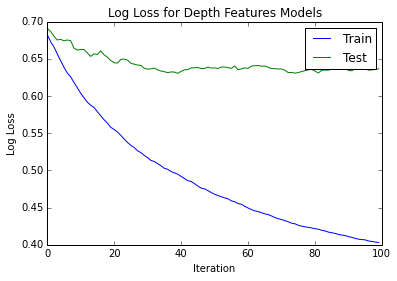

In [640]:
import matplotlib.pyplot as plt

depth_results_full = depth_full.evals_result()

plt.plot(range(len(depth_results_full['validation_0']['logloss'])), depth_results_full['validation_0']['logloss'], label='Train')
plt.plot(range(len(depth_results_full['validation_1']['logloss'])), depth_results_full['validation_1']['logloss'], label='Test')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss for Depth Features Models')
plt.legend()
plt.savefig('logloss_depth.png')


In [532]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

Y_pred = depth_clf.predict(depth_train_input,output_margin=True) #prediksi data cross validation menggunakan model tadi
#train_f1score = f1_score(depth_train_output, Y_pred)
train_rocscore = roc_auc_score(depth_train_output, Y_pred)
#train_accuracy_score = accuracy_score(depth_train_output, Y_pred)

Y_pred = depth_clf.predict(test_input, output_margin=True) #prediksi data cross validation menggunakan model tadi
#test_f1score = f1_score(depth_test_output, Y_pred)
test_rocscore = roc_auc_score(depth_test_output, Y_pred)
#test_accuracy_score = accuracy_score(depth_test_output, Y_pred)

print "Train f1: ", train_f1score
print "Train AUC: ", train_rocscore
print "Train Accuracy: ", train_accuracy_score

print "Test f1: ", test_f1score
print "Test AUC: ", test_rocscore
print "Test Accuracy: ", test_accuracy_score



Train f1:  0.813432835821
Train AUC:  0.923192918964
Train Accuracy:  0.812734082397
Test f1:  0.583333333333
Test AUC:  0.663967611336
Test Accuracy:  0.61038961039


In [527]:
train_f1score

0.81273408239700373

In [485]:
Y_pred = depth_clf.predict(left_train_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Train Accuracy", left_accuracy 

Y_pred = depth_clf.predict(right_train_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Train Accuracy", right_accuracy 


Left Train Accuracy 0.85393258427
Right Train Accuracy 0.426966292135


In [486]:
Y_pred = depth_clf.predict(left_test_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Test Accuracy", left_accuracy 

Y_pred = depth_clf.predict(right_test_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Test Accuracy", right_accuracy 


Left Test Accuracy 0.684210526316
Right Test Accuracy 0.538461538462


In [631]:
breadth_left_train_features = [urlToEmbedding(url, "breadth") for url in left_train]
breadth_left_test_features = [urlToEmbedding(url, "breadth") for url in left_test]
breadth_right_train_features = [urlToEmbedding(url, "breadth") for url in right_train]
breadth_right_test_features = [urlToEmbedding(url, "breadth") for url in right_test]

breadth_train_input, breadth_train_output = createEvalSet(breadth_right_train_features, breadth_left_train_features)
breadth_test_input, breadth_test_output = createEvalSet(breadth_right_test_features, breadth_left_test_features)

breadth_clf = XGBClassifier(n_estimators=500) 

breadth_full = breadth_clf.fit(breadth_train_input, breadth_train_output,
        eval_set=[(breadth_train_input, breadth_train_output), (breadth_test_input, breadth_test_output)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.681786	validation_1-logloss:0.6871
[1]	validation_0-logloss:0.671379	validation_1-logloss:0.67714
[2]	validation_0-logloss:0.661887	validation_1-logloss:0.675844
[3]	validation_0-logloss:0.652449	validation_1-logloss:0.670307
[4]	validation_0-logloss:0.644194	validation_1-logloss:0.66834
[5]	validation_0-logloss:0.635367	validation_1-logloss:0.66313
[6]	validation_0-logloss:0.62769	validation_1-logloss:0.659695
[7]	validation_0-logloss:0.62017	validation_1-logloss:0.653985
[8]	validation_0-logloss:0.613072	validation_1-logloss:0.648775
[9]	validation_0-logloss:0.60719	validation_1-logloss:0.644405
[10]	validation_0-logloss:0.600081	validation_1-logloss:0.644288
[11]	validation_0-logloss:0.59345	validation_1-logloss:0.640873
[12]	validation_0-logloss:0.587478	validation_1-logloss:0.636488
[13]	validation_0-logloss:0.58129	validation_1-logloss:0.634631
[14]	validation_0-logloss:0.575533	validation_1-logloss:0.634051
[15]	validation_0-logloss:0.568252	validation

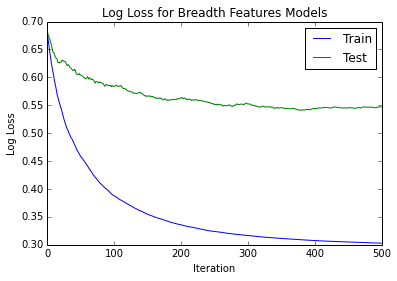

In [639]:
import matplotlib.pyplot as plt

breadth_results_full = breadth_full.evals_result()

plt.plot(range(len(breadth_results_full['validation_0']['logloss'])), breadth_results_full['validation_0']['logloss'], label='Train')
plt.plot(range(len(breadth_results_full['validation_1']['logloss'])), breadth_results_full['validation_1']['logloss'], label='Test')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss for Breadth Features Models')
plt.legend()
plt.savefig('logloss_breadth.png')


In [633]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

Y_pred = breadth_clf.predict(breadth_train_input) #prediksi data cross validation menggunakan model tadi
Y_pred_margin = breadth_clf.predict(breadth_train_input, output_margin=True) #prediksi data cross validation menggunakan model tadi

train_f1score = f1_score(breadth_train_output, Y_pred)
train_rocscore = roc_auc_score(breadth_train_output, Y_pred_margin)
train_accuracy_score = accuracy_score(breadth_train_output, Y_pred)

Y_pred = breadth_clf.predict(breadth_test_input) #prediksi data cross validation menggunakan model tadi
Y_pred_margin = breadth_clf.predict(breadth_test_input, output_margin=True) #prediksi data cross validation menggunakan model tadi

test_f1score = f1_score(test_output, Y_pred)
test_rocscore = roc_auc_score(test_output, Y_pred_margin)
test_accuracy_score = accuracy_score(test_output, Y_pred)

print "Train f1: ", train_f1score
print "Train AUC: ", train_rocscore
print "Train Accuracy: ", train_accuracy_score

print "Test f1: ", test_f1score
print "Test AUC: ", test_rocscore
print "Test Accuracy: ", test_accuracy_score



Train f1:  0.811320754717
Train AUC:  0.924679824377
Train Accuracy:  0.812734082397
Test f1:  0.72
Test AUC:  0.796221322537
Test Accuracy:  0.727272727273


In [603]:
Y_pred = breadth_clf.predict(breadth_left_train_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Train Accuracy", left_accuracy 

Y_pred = breadth_clf.predict(breadth_right_train_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Train Accuracy", right_accuracy 


Left Train Accuracy 0.801498127341
Right Train Accuracy 0.823970037453


In [604]:
Y_pred = breadth_clf.predict(breadth_left_test_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Test Accuracy", left_accuracy 

Y_pred = breadth_clf.predict(breadth_right_test_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Test Accuracy", right_accuracy 


Left Test Accuracy 0.736842105263
Right Test Accuracy 0.666666666667


In [ ]:
# from sklearn.linear_model import LogisticRegression

# reg = LogisticRegression().fit(train_input, train_output)


# from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

# Y_pred = reg.predict(train_input) #prediksi data cross validation menggunakan model tadi
# train_f1score = f1_score(train_output, Y_pred, average="micro")
# train_rocscore = roc_auc_score(train_output, Y_pred)
# train_accuracy_score = accuracy_score(train_output, Y_pred)

# Y_pred = reg.predict(test_input) #prediksi data cross validation menggunakan model tadi
# test_f1score = f1_score(test_output, Y_pred, average="micro")
# test_rocscore = roc_auc_score(test_output, Y_pred)
# test_accuracy_score = accuracy_score(test_output, Y_pred)

# print "Train f1: ", train_f1score
# print "Train AUC: ", train_rocscore
# print "Train Accuracy: ", train_accuracy_score

# print "Test f1: ", test_f1score
# print "Test AUC: ", test_rocscore
# print "Test Accuracy: ", test_accuracy_score

In [ ]:
# Y_pred = reg.predict(left_train_features) #prediksi data cross validation menggunakan model tadi
# left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
# print "Left Train Accuracy", left_accuracy 

# Y_pred = reg.predict(right_train_features) #prediksi data cross validation menggunakan model tadi
# right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
# print "Right Train Accuracy", right_accuracy 


In [ ]:
# Y_pred = reg.predict(left_test_features) #prediksi data cross validation menggunakan model tadi
# left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
# print "Left Test Accuracy", left_accuracy 

# Y_pred = reg.predict(right_test_features) #prediksi data cross validation menggunakan model tadi
# right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
# print "Right Test Accuracy", right_accuracy 


Both Node2Vec

In [649]:
breadth_depth_left_train_features = [np.concatenate((urlToEmbedding(url, "breadth"), urlToEmbedding(url, "depth")), axis=None) for url in left_train]
breadth_depth_left_test_features = [np.concatenate((urlToEmbedding(url, "breadth"), urlToEmbedding(url, "depth")), axis=None) for url in left_test]
breadth_depth_right_train_features = [np.concatenate((urlToEmbedding(url, "breadth"), urlToEmbedding(url, "depth")), axis=None) for url in right_train]
breadth_depth_right_test_features = [np.concatenate((urlToEmbedding(url, "breadth"), urlToEmbedding(url, "depth")), axis=None) for url in right_test]

breadth_depth_train_input, breadth_depth_train_output = createEvalSet(breadth_depth_right_train_features, breadth_depth_left_train_features)
breadth_depth_test_input, breadth_depth_test_output = createEvalSet(breadth_depth_right_test_features, breadth_depth_left_test_features)

breadth_depth_clf = XGBClassifier(n_estimators=400) 


breadth_depth_full = breadth_depth_clf.fit(breadth_depth_train_input, breadth_depth_train_output,
        eval_set=[(breadth_depth_train_input, breadth_depth_train_output), (breadth_depth_test_input, breadth_depth_test_output)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.681108	validation_1-logloss:0.687666
[1]	validation_0-logloss:0.67058	validation_1-logloss:0.679781
[2]	validation_0-logloss:0.660604	validation_1-logloss:0.679993
[3]	validation_0-logloss:0.650097	validation_1-logloss:0.681573
[4]	validation_0-logloss:0.639798	validation_1-logloss:0.676474
[5]	validation_0-logloss:0.631193	validation_1-logloss:0.671992
[6]	validation_0-logloss:0.623485	validation_1-logloss:0.671526
[7]	validation_0-logloss:0.615429	validation_1-logloss:0.672714
[8]	validation_0-logloss:0.60782	validation_1-logloss:0.674454
[9]	validation_0-logloss:0.600324	validation_1-logloss:0.673708
[10]	validation_0-logloss:0.592801	validation_1-logloss:0.6749
[11]	validation_0-logloss:0.585841	validation_1-logloss:0.673217
[12]	validation_0-logloss:0.579853	validation_1-logloss:0.66945
[13]	validation_0-logloss:0.57344	validation_1-logloss:0.663058
[14]	validation_0-logloss:0.567163	validation_1-logloss:0.658696
[15]	validation_0-logloss:0.561807	valida

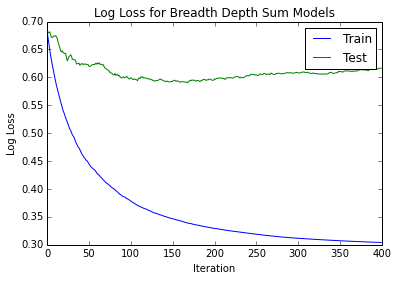

In [645]:
import matplotlib.pyplot as plt

breadth_depth_results_full = breadth_depth_full.evals_result()

plt.plot(range(len(breadth_depth_results_full['validation_0']['logloss'])), breadth_depth_results_full['validation_0']['logloss'], label='Train')
plt.plot(range(len(breadth_depth_results_full['validation_1']['logloss'])), breadth_depth_results_full['validation_1']['logloss'], label='Test')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss for Breadth Depth Sum Models')
plt.legend()
plt.savefig('logloss_breadth_depth_concat.png')


In [647]:
breadth_depth_left_train_features = [urlToEmbedding(url, "breadth") + urlToEmbedding(url, "depth") for url in left_train]
breadth_depth_left_test_features = [urlToEmbedding(url, "breadth")  + urlToEmbedding(url, "depth") for url in left_test]
breadth_depth_right_train_features = [urlToEmbedding(url, "breadth")  + urlToEmbedding(url, "depth") for url in right_train]
breadth_depth_right_test_features = [urlToEmbedding(url, "breadth")  + urlToEmbedding(url, "depth") for url in right_test]

breadth_depth_train_input, breadth_depth_train_output = createEvalSet(breadth_depth_right_train_features, breadth_depth_left_train_features)
breadth_depth_test_input, breadth_depth_test_output = createEvalSet(breadth_depth_right_test_features, breadth_depth_left_test_features)

breadth_depth_clf = XGBClassifier(n_estimators=600) 


breadth_depth_full = breadth_depth_clf.fit(breadth_depth_train_input, breadth_depth_train_output,
        eval_set=[(breadth_depth_train_input, breadth_depth_train_output), (breadth_depth_test_input, breadth_depth_test_output)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.682526	validation_1-logloss:0.691942
[1]	validation_0-logloss:0.673904	validation_1-logloss:0.686529
[2]	validation_0-logloss:0.665297	validation_1-logloss:0.680607
[3]	validation_0-logloss:0.658007	validation_1-logloss:0.670785
[4]	validation_0-logloss:0.651388	validation_1-logloss:0.669439
[5]	validation_0-logloss:0.643557	validation_1-logloss:0.663879
[6]	validation_0-logloss:0.635373	validation_1-logloss:0.659476
[7]	validation_0-logloss:0.627131	validation_1-logloss:0.65976
[8]	validation_0-logloss:0.62145	validation_1-logloss:0.658955
[9]	validation_0-logloss:0.613472	validation_1-logloss:0.650503
[10]	validation_0-logloss:0.606614	validation_1-logloss:0.646755
[11]	validation_0-logloss:0.599592	validation_1-logloss:0.639937
[12]	validation_0-logloss:0.592615	validation_1-logloss:0.636761
[13]	validation_0-logloss:0.587066	validation_1-logloss:0.630545
[14]	validation_0-logloss:0.581043	validation_1-logloss:0.625925
[15]	validation_0-logloss:0.575711	va

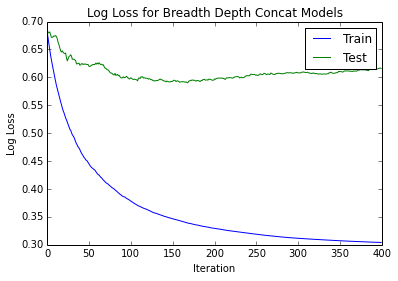

In [650]:
import matplotlib.pyplot as plt

breadth_depth_results_full = breadth_depth_full.evals_result()

plt.plot(range(len(breadth_depth_results_full['validation_0']['logloss'])), breadth_depth_results_full['validation_0']['logloss'], label='Train')
plt.plot(range(len(breadth_depth_results_full['validation_1']['logloss'])), breadth_depth_results_full['validation_1']['logloss'], label='Test')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss for Breadth Depth Concat Models')
plt.legend()
plt.savefig('logloss_breadth_depth_concat.png')


In [614]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

Y_pred = breadth_depth_clf.predict(breadth_depth_train_input) #prediksi data cross validation menggunakan model tadi
Y_pred_margin = breadth_depth_clf.predict(breadth_depth_train_input, output_margin=True) #prediksi data cross validation menggunakan model tadi

train_f1score = f1_score(breadth_depth_train_output, Y_pred)
train_rocscore = roc_auc_score(breadth_depth_train_output, Y_pred_margin)
train_accuracy_score = accuracy_score(breadth_depth_train_output, Y_pred)

Y_pred = breadth_depth_clf.predict(breadth_depth_test_input) #prediksi data cross validation menggunakan model tadi
Y_pred_margin = breadth_depth_clf.predict(breadth_depth_test_input, output_margin=True) #prediksi data cross validation menggunakan model tadi

test_f1score = f1_score(breadth_depth_test_output, Y_pred)
test_rocscore = roc_auc_score(breadth_depth_test_output, Y_pred_margin)
test_accuracy_score = accuracy_score(breadth_depth_test_output, Y_pred)

print "Train f1: ", train_f1score
print "Train AUC: ", train_rocscore
print "Train Accuracy: ", train_accuracy_score

print "Test f1: ", test_f1score
print "Test AUC: ", test_rocscore
print "Test Accuracy: ", test_accuracy_score



Train f1:  0.809160305344
Train AUC:  0.924679824377
Train Accuracy:  0.812734082397
Test f1:  0.682352941176
Test AUC:  0.789473684211
Test Accuracy:  0.649350649351


In [601]:
Y_pred = breadth_depth_clf.predict(breadth_depth_left_train_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Train Accuracy", left_accuracy 

Y_pred = breadth_depth_clf.predict(breadth_depth_right_train_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Train Accuracy", right_accuracy 


Left Train Accuracy 0.865168539326
Right Train Accuracy 0.760299625468


In [602]:
Y_pred = breadth_depth_clf.predict(breadth_depth_left_test_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Test Accuracy", left_accuracy 

Y_pred = breadth_depth_clf.predict(breadth_depth_right_test_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Test Accuracy", right_accuracy 


Left Test Accuracy 0.684210526316
Right Test Accuracy 0.615384615385


In [502]:
left_train_handfeatures = createFeatureVec(left_train)
left_test_handfeatures = createFeatureVec(left_test)
right_train_handfeatures = createFeatureVec(right_train)
right_test_handfeatures = createFeatureVec(right_test)

hand_nodes_left_train_features = [urlToEmbedding(url, "breadth") + urlToEmbedding(url, "depth") for url in left_train]
hand_nodes_left_test_features = [urlToEmbedding(url, "breadth")  + urlToEmbedding(url, "depth") for url in left_test]
hand_nodes_right_train_features = [urlToEmbedding(url, "breadth")  + urlToEmbedding(url, "depth") for url in right_train]
hand_nodes_right_test_features = [urlToEmbedding(url, "breadth")  + urlToEmbedding(url, "depth") for url in right_test]


In [553]:

for i in range(len(left_train_features)):
    hand_nodes_left_train_features[i] = list(hand_nodes_left_train_features[i]) + left_train_handfeatures[i]
for i in range(len(left_test_features)):
    hand_nodes_left_test_features[i] = list(hand_nodes_left_test_features[i]) + left_test_handfeatures[i]
    
for i in range(len(hand_nodes_right_train_features)):
    hand_nodes_right_train_features[i] = list(hand_nodes_right_train_features[i]) + right_train_handfeatures[i]
for i in range(len(hand_nodes_right_test_features)):
    hand_nodes_right_test_features[i] = list(hand_nodes_right_test_features[i]) + right_test_handfeatures[i]


hand_nodes_train_input, hand_nodes_train_output = createEvalSet(hand_nodes_right_train_features, hand_nodes_left_train_features)
hand_nodes_test_input, hand_nodes_test_output = createEvalSet(hand_nodes_right_test_features, hand_nodes_left_test_features)

hand_nodes_clf = XGBClassifier(n_estimators=600) 

hand_nodes_full = hand_nodes_clf.fit(hand_nodes_train_input, hand_nodes_train_output,
        eval_set=[(hand_nodes_train_input, hand_nodes_train_output), (hand_nodes_test_input, hand_nodes_test_output)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.682526	validation_1-logloss:0.691942
[1]	validation_0-logloss:0.673267	validation_1-logloss:0.690902
[2]	validation_0-logloss:0.6628	validation_1-logloss:0.68986
[3]	validation_0-logloss:0.654634	validation_1-logloss:0.684141
[4]	validation_0-logloss:0.64713	validation_1-logloss:0.674759
[5]	validation_0-logloss:0.639307	validation_1-logloss:0.669632
[6]	validation_0-logloss:0.631061	validation_1-logloss:0.664941
[7]	validation_0-logloss:0.623504	validation_1-logloss:0.66693
[8]	validation_0-logloss:0.615564	validation_1-logloss:0.65887
[9]	validation_0-logloss:0.61008	validation_1-logloss:0.65592
[10]	validation_0-logloss:0.603313	validation_1-logloss:0.653395
[11]	validation_0-logloss:0.596842	validation_1-logloss:0.650681
[12]	validation_0-logloss:0.589628	validation_1-logloss:0.645282
[13]	validation_0-logloss:0.58307	validation_1-logloss:0.638569
[14]	validation_0-logloss:0.576525	validation_1-logloss:0.630886
[15]	validation_0-logloss:0.570834	validatio

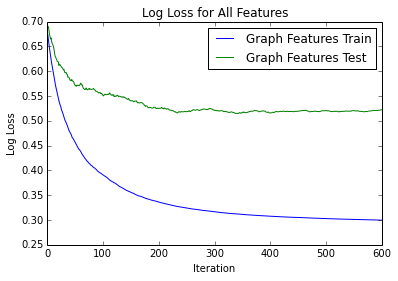

In [641]:
import matplotlib.pyplot as plt

hand_nodes_results_full = hand_nodes_full.evals_result()

plt.plot(range(len(hand_nodes_results_full['validation_0']['logloss'])), hand_nodes_results_full['validation_0']['logloss'], label='Graph Features Train')
plt.plot(range(len(hand_nodes_results_full['validation_1']['logloss'])), hand_nodes_results_full['validation_1']['logloss'], label='Graph Features Test')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss for All Features')
plt.legend()
plt.savefig('logloss_all.png')


In [590]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

Y_pred = hand_nodes_clf.predict(hand_nodes_train_input) #prediksi data cross validation menggunakan model tadi
Y_pred_margin = hand_nodes_clf.predict(hand_nodes_train_input, output_margin=True) 
train_f1score = f1_score(hand_nodes_train_output, Y_pred)
train_rocscore = roc_auc_score(hand_nodes_train_output, Y_pred_margin)
train_accuracy_score = accuracy_score(hand_nodes_train_output, Y_pred)

Y_pred = hand_nodes_clf.predict(hand_nodes_test_input) #prediksi data cross validation menggunakan model tadi
Y_pred_margin = hand_nodes_clf.predict(hand_nodes_test_input, output_margin=True) 
test_f1score = f1_score(hand_nodes_test_output, Y_pred)
test_rocscore = roc_auc_score(hand_nodes_test_output, Y_pred_margin)
test_accuracy_score = accuracy_score(hand_nodes_test_output, Y_pred)

print "Train f1: ", train_f1score
print "Train AUC: ", train_rocscore
print "Train Accuracy: ", train_accuracy_score

print "Test f1: ", test_f1score
print "Test AUC: ", test_rocscore
print "Test Accuracy: ", test_accuracy_score



Train f1:  0.809160305344
Train AUC:  0.924679824377
Train Accuracy:  0.812734082397
Test f1:  0.707317073171
Test AUC:  0.7995951417
Test Accuracy:  0.688311688312


<Container object of 154 artists>

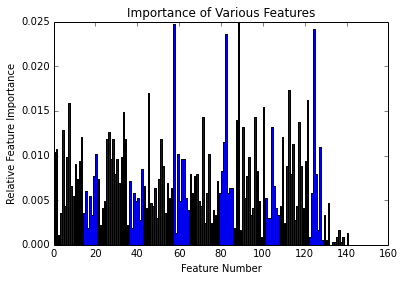

In [743]:
plt.title("Importance of Various Features")
plt.xlabel("Feature Number")
plt.ylabel("Relative Feature Importance")
plt.bar(range(len(hand_nodes_clf.feature_importances_)), hand_nodes_clf.feature_importances_)

In [668]:
hand_nodes_clf.feature_importances_[131]

0.004669047

<Container object of 128 artists>

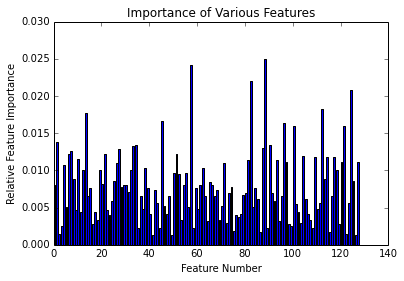

In [583]:
plt.title("Importance of Various Features")
plt.xlabel("Feature Number")
plt.ylabel("Relative Feature Importance")
plt.bar(range(len(breadth_depth_clf.feature_importances_)), breadth_depth_clf.feature_importances_)

<Container object of 13 artists>

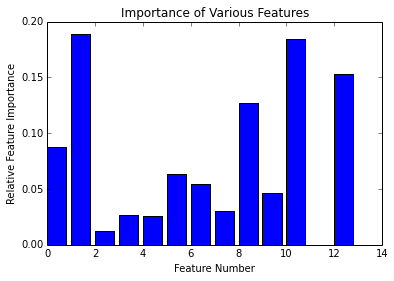

In [594]:
plt.title("Importance of Various Features")
plt.xlabel("Feature Number")
plt.ylabel("Relative Feature Importance")
plt.bar(range(len(hand_clf.feature_importances_)),hand_clf.feature_importances_)

77 77


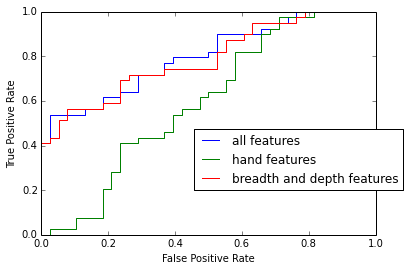

In [578]:
from sklearn import metrics
from matplotlib.font_manager import FontProperties

Y_pred = hand_nodes_clf.predict(hand_nodes_test_input)
print len(hand_nodes_test_output), len(Y_pred)

Y_pred_margin = hand_nodes_clf.predict(hand_nodes_test_input, output_margin=True) 
fpr, tpr, _ = metrics.roc_curve(hand_nodes_test_output,  Y_pred_margin)
auc = metrics.roc_auc_score(hand_nodes_test_output, Y_pred_margin)
plt.plot(fpr,tpr,label="all features")
plt.legend(loc=4)

Y_pred_margin = hand_clf.predict(hand_test_input, output_margin=True) 
fpr, tpr, _ = metrics.roc_curve(hand_test_output,  Y_pred_margin)
auc = metrics.roc_auc_score(breadth_test_output, Y_pred)
plt.plot(fpr,tpr,label="hand features")
plt.legend(loc=4)

Y_pred_margin = breadth_depth_clf.predict(breadth_depth_test_input, output_margin=True) 
fpr, tpr, _ = metrics.roc_curve(breadth_depth_test_output,  Y_pred_margin)
auc = metrics.roc_auc_score(breadth_depth_test_output, Y_pred)
plt.plot(fpr,tpr,label="breadth and depth features")
plt.legend(loc=4)

ax = plt.subplot(111)

ax.legend(bbox_to_anchor=(1.1, 0.5))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

77 77


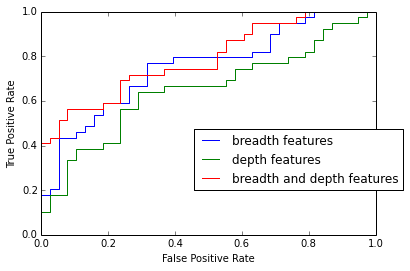

In [579]:
from sklearn import metrics
from matplotlib.font_manager import FontProperties

Y_pred = hand_nodes_clf.predict(hand_nodes_test_input)
print len(hand_nodes_test_output), len(Y_pred)

Y_pred_margin = breadth_clf.predict(breadth_test_input, output_margin=True) 
fpr, tpr, _ = metrics.roc_curve(breadth_test_output,  Y_pred_margin)
auc = metrics.roc_auc_score(breadth_test_output, Y_pred)
plt.plot(fpr,tpr,label="breadth features")
plt.legend(loc=4)

Y_pred_margin = breadth_clf.predict(depth_test_input, output_margin=True) 
fpr, tpr, _ = metrics.roc_curve(depth_test_output,  Y_pred_margin)
auc = metrics.roc_auc_score(depth_test_output, Y_pred)
plt.plot(fpr,tpr,label="depth features")
plt.legend(loc=4)

Y_pred_margin = breadth_depth_clf.predict(breadth_depth_test_input, output_margin=True) 
fpr, tpr, _ = metrics.roc_curve(breadth_depth_test_output,  Y_pred_margin)
auc = metrics.roc_auc_score(breadth_depth_test_output, Y_pred)
plt.plot(fpr,tpr,label="breadth and depth features")
plt.legend(loc=4)

ax = plt.subplot(111)

# Shrink current axis's height by 10% on the bottom
ax = plt.subplot(111)

ax.legend(bbox_to_anchor=(1.1, 0.5))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [556]:
Y_pred = hand_nodes_clf.predict(hand_nodes_left_train_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Train Accuracy", left_accuracy 

Y_pred = hand_nodes_clf.predict(hand_nodes_right_train_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Train Accuracy", right_accuracy 


Left Train Accuracy 0.831460674157
Right Train Accuracy 0.794007490637


In [557]:
Y_pred = hand_nodes_clf.predict(hand_nodes_left_test_features) #prediksi data cross validation menggunakan model tadi
left_accuracy = accuracy_score(Y_pred, len(Y_pred) * [0])
print "Left Test Accuracy", left_accuracy 

Y_pred = hand_nodes_clf.predict(hand_nodes_right_test_features) #prediksi data cross validation menggunakan model tadi
right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
print "Right Test Accuracy", right_accuracy 


Left Test Accuracy 0.631578947368
Right Test Accuracy 0.74358974359


In [510]:
Y_pred = hand_nodes_clf.predict(right_test_features, output_margin=True) #prediksi data cross validation menggunakan model tadi
#right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
#print "Right Test Accuracy", right_accuracy 
print Y_pred

[  1.20716095e+00   2.40437523e-01   1.40725410e+00   9.58906651e-01
   9.83156860e-01   7.13991761e-01  -6.22464359e-01   6.92086279e-01
  -5.44222556e-02   2.47105360e+00   3.84137154e-01  -6.17718883e-02
   1.04251146e+00   2.38233805e+00  -5.14507294e-04  -5.05939484e-01
   8.10590148e-01   9.83693600e-01  -4.07813340e-01   1.52066076e+00
   7.99308181e-01   4.19880688e-01   1.68067906e-02  -4.83315974e-01
  -1.07892966e+00   1.60074925e+00  -2.00365320e-01  -7.26552665e-01
   8.46937224e-02   8.48907113e-01   6.03643537e-01   1.56176698e+00
  -1.02868184e-01   1.19468093e+00   1.72721648e+00   2.34716940e+00
   2.74583530e+00   3.27228165e+00   2.92594396e-02]


In [511]:
Y_pred = hand_nodes_clf.predict(right_test_features) #prediksi data cross validation menggunakan model tadi
#right_accuracy = accuracy_score(Y_pred, len(Y_pred) * [1])
#print "Right Test Accuracy", right_accuracy 
print Y_pred

[1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1
 1 1]


In [512]:
embeddings = {}

for k, v in prunedNodeIDToDomain.iteritems(): 
    embeddings[k] = urlToEmbedding(v, "breadth") + urlToEmbedding(v, "depth")

In [ ]:
len(embeddings)

In [ ]:
embeddings.keys()

In [513]:
scores = {}
for k, v in embeddings.iteritems():
    scores[k] = clf.predict([v], output_margin=True)[0]

In [ ]:
scores

In [697]:
x = []
y = []

for k, v in scores.iteritems():
    x.append(v)
    y.append(NIdCCfH[k])

In [698]:
np.corrcoef(x, y)

array([[ 1.        , -0.02530809],
       [-0.02530809,  1.        ]])

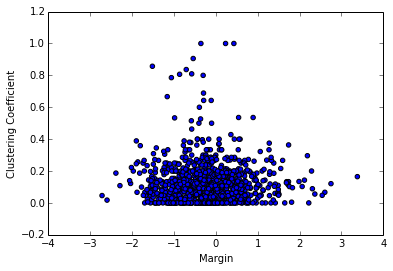

In [522]:
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel("Margin")
plt.ylabel('Clustering Coefficient')
plt.scatter(x, y)

In [ ]:
plt.scatter(x, y)

In [695]:
x = []
y = []
for k, v in scores.iteritems(): 
    neighbors_sum = 0
    
    node = dirLinkGraph.GetNI(k)
    
    for i in range(node.GetDeg()): 
        nbr_node = node.GetNbrNId(i)
        neighbors_sum += scores[nbr_node]
    mean = float(neighbors_sum) / node.GetDeg()
    x.append(v)
    y.append(mean)

In [ ]:
from scipy.stats.stats import pearsonr   
 
print pearsonr(x,y)

In [696]:
np.corrcoef(x, y)

array([[ 1.        ,  0.67921777],
       [ 0.67921777,  1.        ]])

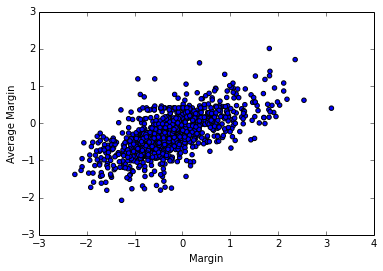

In [520]:
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Margin')
plt.ylabel('Average Margin')
plt.scatter(x, y)

In [692]:
x = []
y = []

for k, v in scores.iteritems():
    x.append(v)
    y.append(PRankH[k])

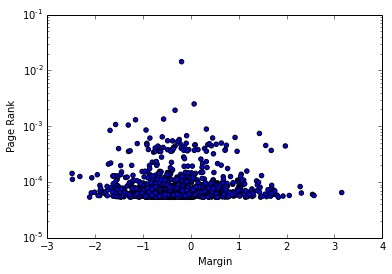

In [693]:
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Margin')
plt.ylabel('Page Rank')
plt.yscale('log')
plt.scatter(x, y)

In [694]:
np.corrcoef(x, y)

array([[ 1.        , -0.00102329],
       [-0.00102329,  1.        ]])

In [675]:
neither = 0
conservative = 0
liberal = 0
for k, v in scores.iteritems():
    if v == 0:
        neither += 1
    elif v > 0:
        conservative += 1
    else:
        liberal += 1

In [676]:
print neither, conservative, liberal

0 2945 5572


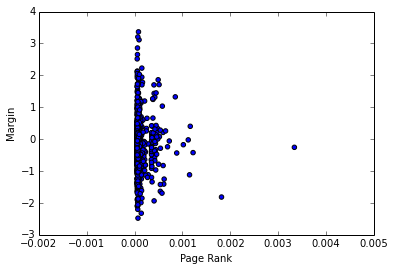

In [679]:
x = []
y = []

for k, v in scores.iteritems():
    x.append(v)
    y.append(PRankH[k])
    
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Page Rank')
plt.ylabel('Margin')
plt.scatter(y, x)

In [750]:
x = []
y = []
for k, v in scores.iteritems(): 
    alpha = 1
    beta = 1
    
    node = dirLinkGraph.GetNI(k)
    
    for i in range(node.GetDeg()): 
        nbr_node = node.GetNbrNId(i)
        if dirLinkGraph.IsEdge(k, nbr_node):
            if scores[nbr_node] > 0: 
                beta += 1
            else:
                alpha += 1
    if alpha == 1 and beta == 1:
        continue
    l = float(alpha)/(alpha + beta)
    p = 2 * abs(0.5 - l)
    x.append(v)
    y.append(p)
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

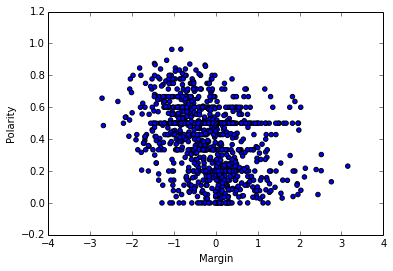

In [751]:
plt.xlabel("Margin")
plt.ylabel('Polarity')
plt.scatter(x, y)

In [686]:
np.corrcoef(x, y)

array([[ 1.        , -0.34726444],
       [-0.34726444,  1.        ]])

In [691]:
left = []
right = []

for idx in range(len(x)):
    if x[idx] < 0: 
        left.append(y[idx])
    else:
        right.append(y[idx])

print np.median(left)
print np.mean(left)
print np.std(left)

print np.median(right)
print np.mean(right)
print np.std(right)

0.5
0.474975096601
0.201641183096
0.305507246377
0.318901673934
0.200670844002


In [699]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(dirLinkGraph, NIdHubH, NIdAuthH)

[[ 1.         -0.01629277]
 [-0.01629277  1.        ]]


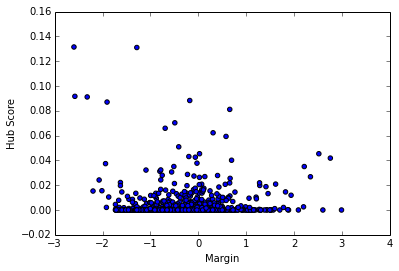

In [701]:
x = []
y = []

for k, v in scores.iteritems():
    x.append(v)
    y.append(NIdHubH[k])
print np.corrcoef(x, y)


    
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Margin')
plt.ylabel('Hub Score')
plt.scatter(x, y)

[[ 1.         -0.03520692]
 [-0.03520692  1.        ]]


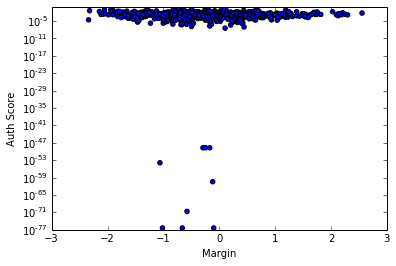

In [749]:
x = []
y = []

for k, v in scores.iteritems():
    x.append(v)
    y.append(NIdAuthH[k])
print np.corrcoef(x, y)
    
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Margin')
plt.ylabel('Auth Score')
plt.yscale('log')
plt.scatter(x, y)

In [705]:
len(prunedDomainToNodeID)
scores[prunedDomainToNodeID["nytimes.com"]]

-2.6000767

In [706]:
print "nytimes.com", scores[prunedDomainToNodeID["nytimes.com"]]
print "cbsnews.com", scores[prunedDomainToNodeID["cbsnews.com"]]
print "abcnews.go.com", scores[prunedDomainToNodeID["abcnews.go.com"]]
print "wsj.com", scores[prunedDomainToNodeID["wsj.com"]]
print "cnn.com", scores[prunedDomainToNodeID["cnn.com"]]
print "usatoday.com", scores[prunedDomainToNodeID["usatoday.com"]]
print "latimes.com", scores[prunedDomainToNodeID["latimes.com"]]
print "bloomberg.com", scores[prunedDomainToNodeID["bloomberg.com"]]
print "washingtonpost.com", scores[prunedDomainToNodeID["washingtonpost.com"]]
print "npr.org", scores[prunedDomainToNodeID["npr.org"]]
print "foxnews.com", scores[prunedDomainToNodeID["foxnews.com"]]
print "vice.com", scores[prunedDomainToNodeID["vice.com"]]
print "huffingtonpost.com", scores[prunedDomainToNodeID["huffingtonpost.com"]]

nytimes.com -2.60008
cbsnews.com -0.489039
abcnews.go.com -1.61127
wsj.com 0.943018
cnn.com -1.73159
usatoday.com -0.0181002
latimes.com -1.69177
bloomberg.com 0.402597
washingtonpost.com -1.28548
npr.org -1.762
foxnews.com 1.7097
vice.com 0.568224
huffingtonpost.com -0.7288


In [725]:
left_far_urls = set(['drudge.com', 'washingtonsources.org', 'akkadiantimes.com', 'deadstate.org', 'thelasource.com', 'americablog.com', 'meduza.io', 'thenewcivilrightsmovement.com', 'newstatesman.com', 'wonkette.com', 'mirror.co.uk', 'libcom.org', 'deepleftfield.info', 'intrepidreport.com', 'rawprogressive.com', 'viraltitle.com', 'worldcantwait.net', 'happy-foxie.com', 'newint.org', 'revcom.us', 'lavendermagazine.com', 'newrepublic.com', 'washingtonpress.com', 'theimproper.com', 'nationofchange.org', 'projectcensored.org', 'peacock-panache.com', 'newpol.org', 'democracyguardian.com', 'dallasvoice.com', 'uproxx.com', 'jezebel.com', 'bluedotdaily.com', 'content.news', 'boingboing.net', 'blacklivesmatter.com', 'reverepress.com', 'whatmattersnews.com', 'au.org', 'hrc.org', 'impeachdjtnow.com', 'leftoverrights.com', 'progressivefrontier.com', 'putintrump.org', 'progressive.org', 'newshounds.us', 'liberationnews.org', 'certifiedpolitics.com', 'angrywhitemen.org', 'forwardprogressives.com', 'theintellectualist.co', 'smirkingchimp.com', 'elitedaily.com', 'leftwingnation.org', 'daily49er.com', 'itsgoingdown.org', 'jacobinmag.com', 'tribunemagazine.org', 'leftscoop.com', 'democraticunderground.com', 'yesmagazine.org', 'newyorker.com', 'theroot.com', 'fifthestate.org', 'electronicintifada.net', 'allthatsfab.com', 'upworthy.com', 'moonofalabama.org', 'themaven.net', 'freepress.org', 'salon.com', 'carbonated.tv', 'mondoweiss.net', 'austinchronicle.com', 'globalvoices.org', 'thedailyvox.co.za', 'yourblackworld.net', 'meanlefthook.com', 'backedbyfact.com', 'gizmodo.com', 'liberalexaminer.com', 'care2.com', 'dctribune.org', 'leftfootforward.org', 'workers.org', 'newslogue.com', 'rewire.news', 'pravdareport.com', 'gq.com', 'foreignpolicyjournal.com', 'redpepper.org.uk', 'act.tv', 'leftsideofhistory.com', 'redyouth.org', 'politicaldig.com', 'crooksandliars.com', 'americanbridgepac.org', 'commondreams.org', 'chicagoreader.com', 'marxist.com', 'dailydot.com', 'nymag.com', 'guardianlv.com', 'telesurtv.net', 'pinknews.co.uk', 'filmingcops.com', 'photographyisnotacrime.com', 'washingtonmonthly.com', 'republicanssucks.org', 'theuspoliticalpost.com', 'ebar.com', 'politicususa.com', 'iowastartingline.com', 'lgbtqnation.com', 'blackagendareport.com', 'foreignpolicynews.org', 'opednews.com', 'thenation.com', 'pastemagazine.com', 'proudemocrat.com', 'thedailybanter.com', 'washingtonjournal.com', 'loveknowledge.org', 'codepink.org', 'worldsocialism.org', 'breitbartunmasked.com', 'samuel-warde.com', 'dailydems.com', 'advocate.com', 'internationalviewpoint.org', 'progressivearmy.com', 'aidc.org.za', 'samefacts.com', 'thefloridasqueeze.com', 'freedomnews.org.uk', 'people.com', 'elisabethparker.com', 'politicalupdater.com', 'earthfirstjournal.org', 'nowthisnews.com', 'wearyourvoicemag.com', 'chroniclesofdemocracy.com', 'thefrisky.com', 'modernliberals.com', 'blue-route.org', 'resilience.org', 'afj.org', 'gopocalypse.org', 'north99.org', 'curvemag.com', 'esquire.com', 'citizencritics.org', 'shadowproof.com', 'readingthepictures.org', 'ir.net', 'leftvoice.org', 'takepart.com', 'democracynow.org', 'other98.com', 'inthesetimes.com', 'scarymommy.com', 'dailykos.com', 'deepstatenation.com', 'feministcurrent.com', 'verrit.com', 'morningstaronline.co.uk', 'currentaffairs.org', 'bust.com', 'dieharddemocrat.com', 'rantt.com', 'littlegreenfootballs.com', 'citypaper.com', 'usuncut.com', 'extranewsfeed.com', 'evonomics.com', 'mashable.com', 'americanprogress.org', 'towleroad.com', 'verifiedpolitics.com', 'syriana-analysis.com', 'nap-sack.org', 'nova-magazine.net', 'tytnetwork.com', 'truth-out.org', 'dissentmagazine.org', 'theguardiansofdemocracy.com', 'redstatedisaster.com', 'nationalmemo.com', 'truthagainstthemachine.com', 'thinkprogress.org', 'countercurrents.org', 'frnewsreport.com', 'zcomm.org', 'mediamatters.org', 'theoswatch.com', 'thegrio.com', 'splinternews.com', 'the-daily.buzz', 'economyincrisis.org', 'texasobserver.org', 'electoral-vote.com', 'antifascistnews.net', 'truthdig.com', 'desmogblog.com', 'liberalamerica.org', 'motherjones.com', 'talkingpointsmemo.com', 'pressprogress.ca', 'ourvoiceny.com', 'addictinginfo.com', 'vox.com', 'everydayfeminism.com', 'merryjane.com', 'vanityfair.com', 'change.org', 'deadspin.com', 'inequalitymedia.org', 'queerty.com', 'rightwingwatch.org', 'front.moveon.org', 'theestablishment.co', 'cnntimes.online', 'pfaw.org', 'revolution-news.com', 'onegreenplanet.org', 'vermontindependent.org', 'prwatch.org', 'slate.com', 'bluenationreview.com', 'greenleft.org.au', 'themilitant.com', 'popularresistance.org', 'ips-dc.org', 'thelily.com', 'whowhatwhy.org', 'readersupportednews.org', 'news.groopspeak.com', 'thesternfacts.com', 'canadiandimension.com', 'rawstory.com', 'vote.us.org', 'molad.org', 'newscorpse.com', 'nowtoronto.com', 'dailynewsbin.com', 'bradford-delong.com', 'dailyrecord.co.uk', 'rabble.ca', 'progressiveliberal.net', 'theburningspear.com', 'bitchmedia.org', 'good.is', 'cnn.com', 'americanindependent.com', 'feministing.com', 'counterpunch.org', 'crimethinc.com', 'middleeastmonitor.com', 'crooked.com', 'huffingtonpost.com', 'freespeech.org', 'climaterealityproject.org', 'firstpost.com', 'egbertowillies.com', 'theoutline.com', 'stpete4peace.org', 'bluestatedaily.com', 'prospect.org', 'msmagazine.com', 'cosmopolitan.com', 'mediaite.com', 'rappler.com', 'villagevoice.com', 'thedailybeast.com', 'socialistworker.org', 'autostraddle.com', 'alternet.org', 'latest.com', 'shareblue.com', 'trofire.com', 'newsweek.com', 'palmerreport.com', 'sourcewatch.org', 'americannewsx.com', 'globetoday.com', 'miaminewtimes.com', 'themarysue.com', 'thewalrus.ca', 'this.org', 'thelondoneconomic.com', 'democratichub.com', 'thecanary.co', 'juancole.com', 'greenvillegazette.com'])
left_center_urls = set(['helsinkitimes.fi', 'indystar.com', 'news.trust.org', 'canadalandshow.com', 'lapresse.ca', 'timescolonist.com', 'ahtribune.com', 'rudaw.net', 'berkshireeagle.com', 'almasdarnews.com', 'theatlantic.com', 'wgntv.com', 'thenewstribune.com', 'ozy.com', 'politico.com', 'syriahr.com', 'billmoyers.com', 'denverpost.com', 'thelocal.no', 'populationconnection.org', 'elpasotimes.com', 'nakedcapitalism.com', 'buffalonews.com', 'thecitizen.org.au', 'ynetnews.com', 'timesofisrael.com', 'glamour.com', 'windsorstar.com', 'sfgate.com', 'stltoday.com', 'politicsthatwork.com', 'newsandgutsmedia.com', 'jointcenter.org', 'ydr.com', 'democratandchronicle.com', 'credoaction.com', 'vancouversun.com', 'outsidethebeltway.com', 'twincities.com', 'thenewtropic.com', 'scroll.in', 'phoenixnewtimes.com', 'taxjustice.net', 'mediafiledc.com', 'thefifthcolumnnews.com', 'freep.com', 'emirates247.com', 'wnyc.org', 'spiegel.de', 'thetab.com', 'al-monitor.com', 'saudigazette.com.sa', 'lethbridgeherald.com', 'atlantablackstar.com', 'urban.org', 'revealnews.org', 'bustle.com', 'legitgov.org', 'mwcnews.net', 'thewire.in', 'hindustantimes.com', 'themoscowtimes.com', 'humanium.org', 'cbsnews.com', 'fair.org', 'insidehighered.com', 'rfa.org', 'deccanherald.com', 'youthradio.org', 'qz.com', 'resourcegovernance.org', 'wingsoverscotland.com', 'dutchdailynews.com', 'sojo.net', 'lawfareblog.com', 'jihadica.com', 'panampost.com', 'economictimes.indiatimes.com', 'tomdispatch.com', 'greensboro.com', 'nj.com', 'caribbeanlifenews.com', 'insideclimatenews.org', 'inquirer.net', 'ohio.com', 'capitalgazette.com', 'diversityinc.com', 'therealnews.com', 'newsite.thehindu.com', 'shameproject.com', 'themonthly.com.au', 'abcnews.go.com', 'citizen.org', 'votevets.org', 'dawn.com', 'sandiegofreepress.org', 'kmov.com', 'newsy.com', 'heavy.com', 'staradvertiser.com', 'tucson.com', 'dailyclimate.org', 'bbc.com', 'neweurope.eu', 'alhayat.com', 'birminghammail.co.uk', 'commoncause.org', 'roanoke.com', 'cleantechnica.com', 'ajc.com', 'monthlyreview.org', 'bluestemprairie.com', 'courant.com', 'emptywheel.net', 'rooseveltinstitute.org', 'citizensforethics.org', 'silive.com', 'earthjustice.org', 'sootoday.com', 'necn.com', 'engadget.com', 'newser.com', 'morningconsult.com', 'ndtv.com', 'economicshelp.org', 'annistonstar.com', 'kotaku.com', 'nbcnews.com', 'berkeleyside.com', 'insidephilanthropy.com', 'opendemocracy.net', 'fpif.org', 'abc11.com', 'worldpolicy.org', 'gaystarnews.com', 'nationinstitute.org', 'news.cn', 'koreatimes.co.kr', 'newsday.com', 'independent.com', 'courier-journal.com', 'ncpolicywatch.com', 'propublica.org', 'time.com', 'positive.news', 'fresnobee.com', 'globalcitizen.org', 'sbs.com.au', 'inverse.com', 'prospectmagazine.co.uk', 'sfexaminer.com', 'news.sky.com', 'indymedia.org', 'news.mongabay.com', 'kurdistan24.net', 'msn.com', 'vice.com', 'icenews.is', 'carolinapublicpress.org', 'irrawaddy.com', 'fightforthefuture.org', 'euractiv.com', 'theneed2know.com', 'cctv-america.com', 'presstv.com', 'digg.com', 'inquisitr.com', 'fusion.net', 'factmyth.com', 'affinitymagazine.us', 'uawire.org', 'alliedprogress.org', 'miamiherald.com', 'tabletmag.com', 'statesman.com', 'seattletimes.com', 'taxpolicycenter.org', 'nydailynews.com', 'ctvnews.ca', 'greentechmedia.com', 'fastcompany.com', 'ctj.org', 'thestranger.com', 'chicago.suntimes.com', 'ciponline.org', 'theautomaticearth.com', 'calgaryherald.com', 'cnbc.com', 'wvgazettemail.com', 'republicworld.com', 'al-sura.com', 'thisisthezerohour.com', 'metro.co.uk', 'politicalcritique.org', 'hurriyetdailynews.com', 'feministfrequency.com', 'inews.co.uk', 'startribune.com', 'tampabay.com', 'eff.org', 'macleans.ca', 'lawnewz.com', 'psmag.com', 'adn.com', 'nrdc.org', 'freakonomics.com', 'metro.us', 'liberalmountain.com', 'natmonitor.com', 'newstimes.com', 'globalriskinsights.com', 'baltimoresun.com', 'nature.org', 'rationalwiki.org', 'sfglobe.com', 'timesheadline.com', 'delawareonline.com', 'swissinfo.ch', 'freepress.net', 'wilderness.org', 'sltrib.com', 'guttmacher.org', 'baptistnews.com', 'ibtimes.com', 'geopoliticsalert.com', 'budapestbeacon.com', 'pilotonline.com', 'euobserver.com', 'muncievoice.com', 'thetyee.ca', 'thechristianleft.org', 'stopfake.org', 'cjr.org', 'koco.com', 'bangordailynews.com', 'pluralist.com', 'minnpost.com', 'nytimes.com', 'newmatilda.com', 'bostonglobe.com', 'citizentruth.org', 'demos.org', 'populardemocracy.org', 'colombiareports.com', 'ifamericaknew.org', 'healthyway.com', 'attn.com', 'thebaffler.com', 'mprnews.org', 'theringer.com', 'thestar.com', 'worldaffairsjournal.org', 'theguardian.com', 'imeu.org', 'globaltimes.cn', 'citizen-times.com', 'sacbee.com', 'migrationpolicy.org', 'hollywoodreporter.com', 'mysanantonio.com', 'northjersey.com', 'yahoo.com', 'corporatepresidency.org', 'irinnews.org', 'hcn.org', 'backchannel.com', 'upr.org', 'fivethirtyeight.com', 'businessinsider.com', 'tcf.org', 'atlanticmedia.com', 'thehill.com', 'charlotteobserver.com', 'knightfoundation.org', 'medium.com', 'thevarsity.ca', 'santafenewmexican.com', 'oilandwaterdontmix.org', 'wired.com', 'pressdemocrat.com', 'pbs.org', 'canadians.org', 'pressherald.com', 'philly.com', 'ocweekly.com', 'thesaturdaypaper.com.au', 'lifehacker.com', 'theoslotimes.com', 'aol.com', 'npr.org', 'commonwealmagazine.org', 'ips.org', 'leftjustified.com', 'nationalobserver.com', 'interpretermag.com', 'adl.org', 'sentencingproject.org', 'bloomberg.com', 'hrw.org', 'investigaterussia.org', 'chicagoreporter.com', 'rollingstone.com', 'theintercept.com', 'nationalnewswatch.com', 'pri.org', 'oneindia.com', 'dailytarheel.com', 'theweek.com', 'uft.org', 'cleveland.com', 'councilforthenationalinterest.org', 'theage.com.au', 'theolympian.com', 'africanarguments.org', 'ourworldindata.org', 'magazine.atavist.com', 'newsdeeply.com', 'dutchreview.com', 'dw.com', 'stocksnewsdaily.com', 'deadline.com', 'aljazeera.com', 'mainebeacon.com', 'abovethelaw.com', 'aclu.org', 'forward.com', 'thestate.com', 'liveleak.com', 'providencejournal.com', 'mic.com', 'kuow.org', 'mtdemocrat.com', 'ecfr.eu', 'irishtimes.com', 'elpais.com', 'thetrace.org', 'commonwealthfund.org', 'newsone.com', 'france24.com', 'newsobserver.com', 'wallstreetonparade.com', 'aranews.net', 'mintpressnews.com', 'fairvote.org', 'thesunmagazine.org', 'eastbaytimes.com', 'independentaustralia.net', 'usatoday.com', 'calwatchdog.com', 'zeit.de', 'exposingtruth.com', 'latimes.com', 'cbc.ca', 'news.com.au', 'toinformistoinfluence.com', 'thenextweb.com', 'universitybusiness.com', 'kentucky.com', 'smh.com.au', 'texasmonthly.com', 'worldcrunch.com', 'buzzfeed.com', 'newmoderate.com', 'dailyhive.com', 'amny.com', 'heraldnet.com', 'haaretz.com', 'timesunion.com', 'jsonline.com', 'washingtonblade.com', 'itep.org', 'newsgru.com', 'sfchronicle.com', 'brookings.edu', 'alaraby.co.uk', 'axios.com', 'lohud.com', 'youthrights.org', 'independent.co.uk', 'egyptianstreets.com', 'stepfeed.com', 'harpers.org', 'americamagazine.org', 'vulture.com', 'seattlepi.com', 'patrioticmillionaires.org', 'newleftreview.org', 'scoopwhoop.com', 'fwweekly.com', 'nola.com', 'pennlive.com', 'mexiconewsdaily.com', 'ipolitics.ca', 'jpost.com', 'kfor.com', 'rightweb.irc-online.org', 'usnews.com', 'crosscut.com', 'washingtonpost.com', 'icrw.org', 'historynewsnetwork.org', 'thenevadaindependent.com', 'sandiegoreader.com', 'bjreview.com', 'techdirt.com', 'crisisgroup.org', 'techcrunch.com', 'religionnews.com', 'latintimes.com', 'stuff.co.nz', 'epi.org', 'montrealgazette.com', 'globalnews.ca', 'unicornriot.ninja', 'opposingviews.com', 'democracy21.org', 'grist.org', 'naacp.org', 'azdailysun.com', 'pulsegulfcoast.com', 'us.blastingnews.com', 'governing.com', 'edmontonjournal.com', 'highline.huffingtonpost.com', 'secondnexus.com', 'theverge.com', 'kansascity.com', 'mercurynews.com', 'aeon.co', 'apmreports.org', 'dcreport.org', 'cbpp.org', 'theodysseyonline.com', 'transequality.org', 'factbox.tv', 'timeline.com', 'mnn.com', 'splcenter.org', 'brennancenter.org'])
right_center_urls = set(['newsheist.com', 'theobjectivestandard.com', 'washingtontimes.com', 'hpenews.com', 'gazette.com', 'cfr.org', 'al.com', 'richmond.com', 'pe.com', 'lexingtoninstitute.org', 'realcleardefense.com', 'policyed.org', 'theihs.org', 'newsrescue.com', 'thesmokinggun.com', 'financialpost.com', 'thegazette.com', 'hoover.org', 'cjnews.com', 'duluthnewstribune.com', 'manhattan-institute.org', 'cincinnati.com', 'studentnewsdaily.com', 'jamestown.org', 'columbiadailyherald.com', 'lbc.co.uk', 'breakingdefense.com', 'thefiscaltimes.com', 'militarytimes.com', 'lfpress.com', 'checkyourfact.com', 'desertsun.com', 'watchdog.org', 'nationalaffairs.com', 'taxpayer.com', 'heraldsun.com.au', 'thenewatlantis.com', 'nationalpost.com', 'postbulletin.com', 'cjonline.com', 'thereaganbattalion.com', 'dallasnews.com', 'post-gazette.com', 'jewishpress.com', 'christianitytoday.com', 'fortnightlyreview.co.uk', 'chicagotribune.com', '9news.com.au', 'realclearreligion.org', 'washingtonbabylon.com', 'srnnews.com', 'volkskrant.nl', 'lynx.media', 'thenational.ae', 'commdiginews.com', 'thebreakthrough.org', 'rstreet.org', 'algemeiner.com', 'honestreporting.com', 'circa.com', 'news-gazette.com', 'arkansasonline.com', 'theamericanconservative.com', 'tennessean.com', 'eppc.org', 'the-japan-news.com', 'savannahnow.com', 'tbo.com', 'americanfirearms.org', 'fpri.org', 'israelnationalnews.com', 'acsh.org', 'thelibertarianrepublic.com', 'valuewalk.com', 'manilatimes.net', 'realclearpolitics.com', 'rep-am.com', 'thechronicleherald.ca', 'deseretnews.com', 'spectator.co.uk', 'justfacts.com', 'heterodoxacademy.org', 'thetimes.co.uk', 'couriermail.com.au', 'ottawacitizen.com', 'guns.com', 'nation.com.pk', 'westmonster.com', 'antiwar.com', 'swarajyamag.com', 'sungazette.com', 'remingtonresearchgroup.com', 'americanactionforum.org', 'tulsaworld.com', 'theaustralian.com.au', 'thehindubusinessline.com', 'straitstimes.com', 'peninsuladailynews.com', 'japantoday.com', 'foreignpolicyi.org', 'deccanchronicle.com', 'statesmanjournal.com', 'fbherald.com', 'independent.ie', 'standard.co.uk', 'independent.org', 'nypost.com', '71republic.com', 'downsizinggovernment.org', 'sofrep.com', 'cato.org', 'reviewjournal.com', 'gulfnews.com', 'orlandosentinel.com', 'thetimesherald.com', 'forbes.com', 'dispatch.com', 'spokesman.com', 'oklahoman.com', 'freedomhouse.org', 'the-american-interest.com', 'thestarphoenix.com', 'cei.org', 'afpc.org', 'sbsun.com', 'israelhayom.com', 'itv.com', 'mises.org', 'tharawat-magazine.com', 'thequint.com', 'rasmussenreports.com', 'justfactsdaily.com', 'telegraph.co.uk', 'billingsgazette.com', 'azcentral.com', 'mackinac.org', 'tass.com', 'learnliberty.org', 'taxfoundation.org', 'omaha.com', 'oilprice.com', 'jewishbreakingnews.com', 'jns.org', 'capoliticalreview.com', 'campaignforliberty.org', 'reason.com', 'triblive.com', 'punchingbagpost.com', 'franklincenterhq.org', 'sputniknews.com', 'inhomelandsecurity.com', 'realclearinvestigations.com', 'tnonline.com', 'insidesources.com', 'oaoa.com', 'ocregister.com', 'group30.org', 'koreaherald.com', 'realclearpolicy.com', 'arabnews.com', 'fortune.com', 'russia-insider.com', 'theepochtimes.com', 'daltondailycitizen.com', 'dailynews.com', 'wsj.com', 'nationalinterest.org', 'fraserinstitute.org', 'sun-sentinel.com', 'calgarysun.com', 'fee.org', 'c4ss.org', 'jacksonville.com', 'thewest.com.au', 'bostonherald.com', 'nos.nl', 'pacificresearch.org', 'edmontonsun.com', 'theglobeandmail.com', 'newsline.com', 'theecjournal.com', 'timeslive.co.za', 'mynorthwest.com', 'kutv.com', 'detroitnews.com', 'ntd.tv', 'journalnow.com', 'humanprogress.org', 'tallahassee.com', 'oregonlive.com', 'mlive.com', 'star-telegram.com', 'international.thenewslens.com', 'toledoblade.com', 'chronicle.augusta.com', 'dailyherald.com', 'valleynewslive.com', 'libertyviral.com', 'faithfamilyamerica.com', 'wikileaks.org', 'dailypress.com', 'armstrongeconomics.com', 'kansas.com', 'thejacknews.com', 'strategic-culture.org', 'quillette.com', 'bipartisanpolicy.org', 'americasquarterly.org'])
right_far_urls = set(['twitchy.com', 'hermancain.com', 'politifeed.net', 'capitalresearch.org', 'politicsnote.com', 'powerlineblog.com', 'clear-politics.com', 'thecitizenpress.com', 'redflagnews.com', 'lifenews.com', 'bluelivesmatter.blue', 'mrc.org', 'commentarymagazine.com', 'nccivitas.org', 'gopusa.com', 'controversialtimes.com', 'thesun.co.uk', 'tennesseestar.com', 'unbiasedamerica.com', 'thenewamerican.com', 'aa.com.tr', 'redalertpolitics.com', 'cowgernation.com', 'opslens.com', 'therightscoop.com', 'hoover.org', 'onenewsnow.com', 'teapartytribune.com', 'therealstrategy.com', 'faithwire.com', 'ronpaullibertyreport.com', 'theblaze.com', 'westernjournal.com', 'crimeresearch.org', 'christiannewsalerts.com', 'beinglibertarian.com', 'unitynewsnetwork.co.uk', 'fedsoc.org', 'vesselnews.io', 'unionleader.com', 'notliberal.com', 'adelaidenow.com.au', 'erlc.com', 'alphanewsmn.com', 'factsandlogic.org', 'campaignlifecoalition.com', 'drudgereport.com', 'firstinfreedomdaily.com', 'libertyhangout.org', 'conservativedailynews.com', 'offgridsurvival.com', 'ibleedredwhiteblue.com', 'ac2news.com', 'whatfinger.com', 'thedailyliberator.com', 'dcstatesman.com', 'acculturated.com', 'politichicks.com', 'order-order.com', 'freedomworks.org', 'theblacksphere.net', 'dailysignal.com', 'express.co.uk', 'ronpaulinstitute.org', 'americanthinker.com', 'mediaequalizer.com', 'jewishworldreview.com', 'gop.com', 'nationalreview.com', 'ipatriot.com', 'newrevolutionnow.org', 'kansaspolicy.org', 'libertynation.com', 'economicpolicyjournal.com', 'renewedright.com', 'thefederalist.com', 'lyincomey.com', 'freerepublic.com', 'freewestmedia.com', 'altnewsmedia.net', 'conservativetoday.com', 'sbgi.net', 'chicksontheright.com', 'debatepost.com', 'restoreamericanglory.com', 'farleftwatch.com', 'ussanews.com', 'futureinamerica.com', 'colddeadhands.us', 'unwatch.org', 'en.mehrnews.com', 'illinoispolicy.org', 'uspoliticsinfo.com', 'americanmilitarynews.com', 'defenddemocracy.org', 'home.nra.org', 'projectveritas.com', 'americanewshub.com', 'dangerous.com', 'conservativewoman.co.uk', 'theconservativenut.gop', 'theamericancause.org', 'biggovernment.news', 'whitehouse.gov', 'tasnimnews.com', 'observer.com', 'humanevents.com', 'bigleaguepolitics.com', 'publicinterestlegal.org', 'nextnewsnetwork.com', 'ammoland.com', 'spectator.org', 'patriotpost.us', 'numbersusa.com', 'ijr.com', 'legalinsurrection.com', 'loneconservative.com', 'therebel.media', 'quadrant.org.au', 'wnd.com', 'dailytelegraph.com.au', 'brexitcentral.com', 'newbostonpost.com', 'regated.com', 'thedailydefender.com', 'townhall.com', 'dcwhispers.com', 'silenceisconsent.net', 'worldtribune.com', 'conservativebase.com', 'newlypress.com', 'foxnews.com', 'iwf.org', 'rd.com', 'westernfreepress.com', 'ca-political.com', 'citizensunited.org', 'keepandbear.com', 'judicialnetwork.com', 'youngcons.com', 'freebeacon.com', 'jewishpolicycenter.org', 'citizenfreepress.com', 'lifesitenews.com', 'aclj.org', 'academia.org', 'conservativereview.com', 'sonorannews.com', 'teapartypatriots.org', 'beliefnet.com', 'nationalcenter.org', 'firstthings.com', 'dailymail.co.uk', 'tpusa.com', '2ndvote.com', 'awm.com', 'newsbusters.org', 'dailycaller.com', 'weaselzippers.us', 'heritage.org', 'americandailynews.org', 'mercatornet.com', 'ontarioproud.ca', 'federalistpress.com', 'ntknetwork.com', 'acting-man.com', 'conservativeshere.com', 'politi.site', 'weeklystandard.com', 'ricochet.com', 'mediacircus.com', 'libertyheadlines.com', 'g-a-i.org', 'investors.com', 'hillarydaily.com', 'imprimis.hillsdale.edu', 'bearingarms.com', 'chroniclesmagazine.org', 'guerrilla.news', 'knoxreport.com', 'westernjournalism.com', 'louderwithcrowder.com', 'allenbwest.com', 'tehrantimes.com', 'standpointmag.co.uk', 'oann.com', 'getreligion.org', 'deplorablesreport.com', 'energycitizens.org', 'crisismagazine.com', 'fightpp.org', 'tribunist.com', 'themilreview.com', 'alec.org', 'churchmilitant.com', 'hudson.org', 'ifstudies.org', 'gatestoneinstitute.org', 'aei.org', 'campusreform.org', 'patriotretort.com', 'populistwire.com', 'world.wng.org', 'amgreatness.com', 'city-journal.org', 'washingtonexaminer.com', 'intellectualtakeout.org', 'thehayride.com', 'arizonadailyindependent.com', 'therantidote.com', 'theresurgent.com', 'americanlibertyreport.com', 'dailysurge.com', 'disobedientmedia.com', 'libertytalk.fm', 'theconservativetreehouse.com', 'conservativeoutfitters.com', 'americanconsequences.com', 'libertynews.com', 'bizpacreview.com', 'thetruthaboutguns.com', 'newsmax.com', 'torontosun.com', 'lifezette.com', 'heartland.org', 'secureamericanow.org', 'thepostemail.com', 'ff.org', 'cscmediagroupus.com', 'thecollegefix.com', 'carepublican.com', 'heatst.com', 'trtworld.com', 'conservativesus.party', 'independentsentinel.com', 'vivaliberty.com', 'aim.org', 'familysecuritymatters.org', 'yellowhammernews.com', 'lifeandabout.com', 'offendedamerica.com', 'sentinelksmo.org', 'savejersey.com', 'resistancemedia.org', 'christianpost.com', 'thepostmillennial.com', 'conservativeinstitute.org', 'thepoliticalinsider.com', 'yaf.org', 'dailysabah.com', 'pjmedia.com', 'spiked-online.com', 'freedomcrossroads.com', 'dailywire.com', 'patriotnewsdaily.com', 'usapoliticstoday.com', 'conservativehq.com'])

left_scores = []
for url in left_far_urls: 
    if url not in prunedDomainToNodeID or url not in left_test:
        continue
    left_scores.append(scores[prunedDomainToNodeID[url]])
print np.median(left_scores), np.mean(left_scores), np.std(left_scores)

-0.183147 -0.294242 0.589914


In [724]:
left_center_scores = []
for url in left_center_urls: 
    if url not in prunedDomainToNodeID or url not in left_test:
        continue
    left_center_scores.append(scores[prunedDomainToNodeID[url]])
print np.median(left_center_scores), np.mean(left_center_scores), np.std(left_center_scores)

-0.0245736 -0.148907 0.61121


In [723]:
right_center_scores = []
for url in right_center_urls: 
    if url not in prunedDomainToNodeID or url not in right_test:
        continue
    right_center_scores.append(scores[prunedDomainToNodeID[url]])
print np.median(right_center_scores), np.mean(right_center_scores), np.std(right_center_scores)

0.511019 0.364598 0.545948


In [722]:
right_far_scores = []
for url in right_far_urls: 
    if url not in prunedDomainToNodeID or url not in right_test:
        continue
    right_far_scores.append(scores[prunedDomainToNodeID[url]])

print np.median(right_far_scores), np.mean(right_far_scores), np.std(right_far_scores)

0.695455 0.837169 0.965632


In [719]:
len(right_test)

39

In [720]:
print len(right_far_scores)

74


In [726]:
polarity = {} 

x = []
y = []
for k, v in scores.iteritems(): 
    alpha = 1
    beta = 1
    
    node = dirLinkGraph.GetNI(k)
    
    for i in range(node.GetDeg()): 
        nbr_node = node.GetNbrNId(i)
        if dirLinkGraph.IsEdge(k, nbr_node):
            if scores[nbr_node] > 0: 
                beta += 1
            else:
                alpha += 1
    l = float(alpha)/(alpha + beta)
    p = 2 * abs(0.5 - l)
    polarity[k] = p

[[ 1.          0.09097679]
 [ 0.09097679  1.        ]]


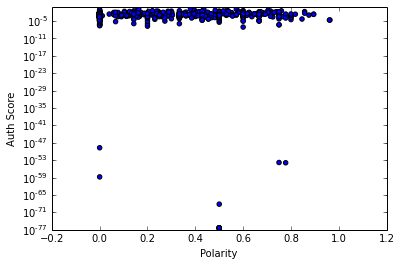

In [747]:
x = []
y = []

for k, v in polarity.iteritems():
    x.append(v)
    y.append(NIdAuthH[k])
print np.corrcoef(x, y)
    
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Polarity')
plt.ylabel('Auth Score')
plt.yscale('log')
plt.scatter(x, y)

[[ 1.          0.22532362]
 [ 0.22532362  1.        ]]


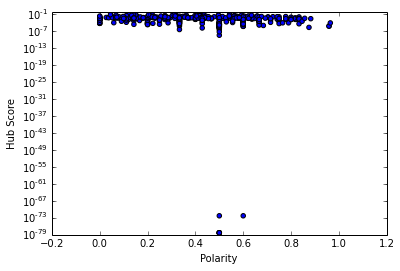

In [748]:
x = []
y = []

for k, v in polarity.iteritems():
    x.append(v)
    y.append(NIdHubH[k])
print np.corrcoef(x, y)
    
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Polarity')
plt.ylabel('Hub Score')
plt.yscale('log')
plt.scatter(x, y)

[[ 1.          0.19076747]
 [ 0.19076747  1.        ]]


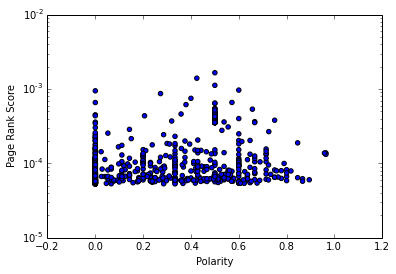

In [744]:
x = []
y = []

for k, v in polarity.iteritems():
    x.append(v)
    y.append(PRankH[k])
print np.corrcoef(x, y)
    
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel('Polarity')
plt.yscale('log')
plt.ylabel('Page Rank Score')
plt.scatter(x, y)

In [735]:
x = []
y = []
for k, v in polarity.iteritems(): 
    neighbors_sum = 0
    
    node = dirLinkGraph.GetNI(k)
    
    for i in range(node.GetDeg()): 
        nbr_node = node.GetNbrNId(i)
        neighbors_sum += polarity[nbr_node]
    mean = float(neighbors_sum) / node.GetDeg()
    x.append(v)
    y.append(mean)
print np.corrcoef(x, y)

[[ 1.          0.05237066]
 [ 0.05237066  1.        ]]


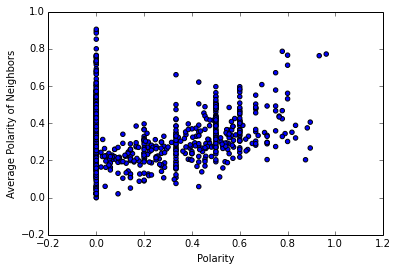

In [734]:
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]



plt.xlabel('Polarity')
plt.ylabel('Average Polarity of Neighbors')
plt.scatter(x, y)

(array([ 5009.,   333.,   459.,   446.,   408.,   909.,   571.,   221.,
          124.,    37.]),
 array([ 0.        ,  0.09642857,  0.19285714,  0.28928571,  0.38571429,
         0.48214286,  0.57857143,  0.675     ,  0.77142857,  0.86785714,
         0.96428571]),
 <a list of 10 Patch objects>)

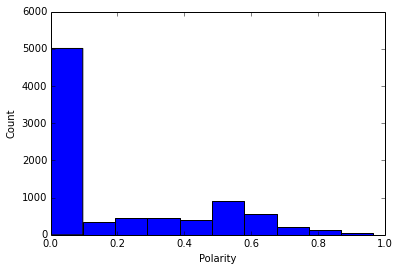

In [737]:
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.hist(polarity.values())

[[ 1.         0.1394431]
 [ 0.1394431  1.       ]]


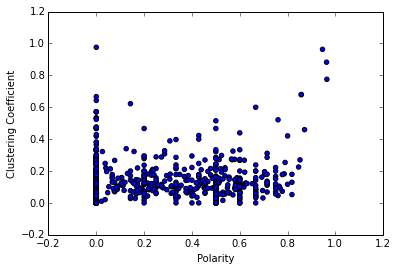

In [742]:
x = []
y = []

for k, v in polarity.iteritems():
    x.append(v)
    y.append(NIdCCfH[k])
print np.corrcoef(x, y)
sample = random.sample(range(len(x)), 1000)
x = [x[i] for i in sample]
y = [y[i] for i in sample]

plt.xlabel("Polarity")
plt.ylabel('Clustering Coefficient')
plt.scatter(x, y)